## Account analytics

<img src="https://blinkux.com/uploads/User-Research-and-Data-Analytics.jpg" alt="analytics" width="500" height="auto"/>

This notebook parses data that comes in CSV form from TD Ameritrade and presents account analytics drawn from the daily returns.

The raw data contains rows with dates and the corresponding account values.

Analyzing this data provides us with valuable insights that can help drive our decision making process and improve our trading strategies.

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import quantstats as qs

In [8]:
mpl.style.use('seaborn')
mpl.rcParams['figure.dpi'] = 300

In [13]:
account = pd.read_csv(os.path.join('../data', 'account.csv'))
account.columns = ['date', 'value']
account['date'] = pd.to_datetime(account['date'], format='%m/%d/%Y')
account['value'] = account['value'].str.replace(',', '').astype(float)
account.set_index('date', inplace=True)
account = account['value']  # To series
account

date
2021-01-04    28754.91
2021-01-05    28754.91
2021-01-06    28754.91
2021-01-07    28754.91
2021-01-08    28754.91
                ...   
2021-08-09    30514.52
2021-08-10    30295.46
2021-08-11    30371.52
2021-08-12    30232.39
2021-08-13    30472.32
Name: value, Length: 160, dtype: float64

<AxesSubplot:title={'center':'Account Value Over Time (2021)'}, xlabel='Date', ylabel='Account Value'>

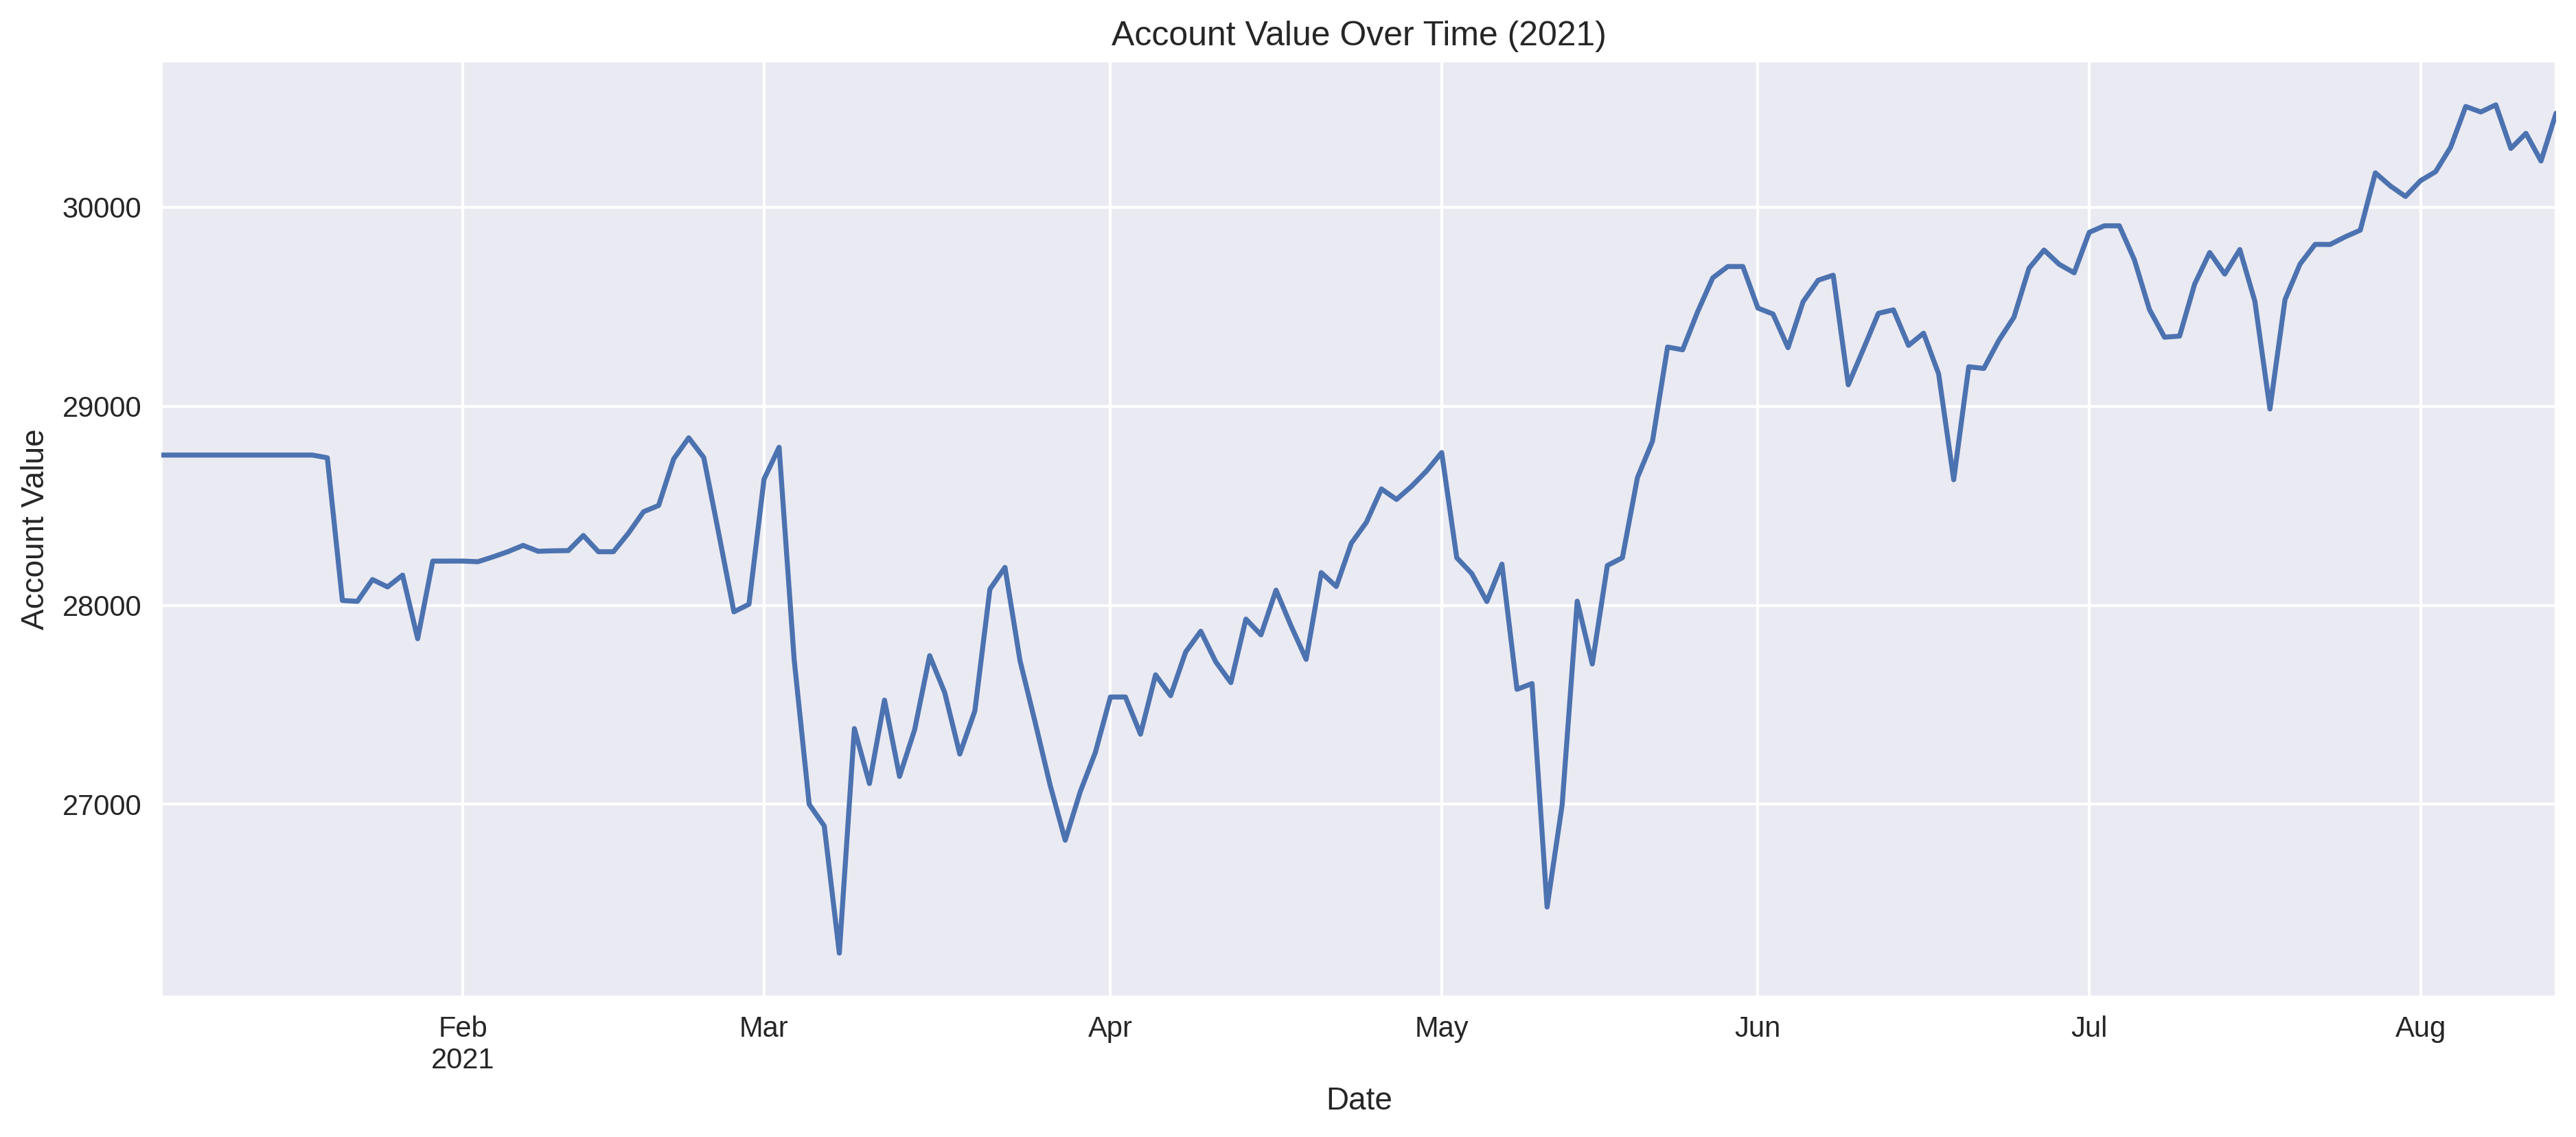

In [10]:
account.plot(title='Account Value Over Time (2021)', xlabel='Date', ylabel='Account Value', figsize=(15, 6))

In [11]:
returns_type = 'normal'  # 'normal' or 'log'

if returns_type == 'normal':
    returns = account.pct_change().dropna()
elif returns_type == 'log':
    returns = np.log(account / account.shift()).dropna()
else:
    raise ValueError('Wrong return type.')

returns = returns[returns.ne(0)]
returns

date
2021-01-19   -0.000471
2021-01-20   -0.024952
2021-01-21   -0.000157
2021-01-22    0.003907
2021-01-25   -0.001311
                ...   
2021-08-09    0.001173
2021-08-10   -0.007179
2021-08-11    0.002511
2021-08-12   -0.004581
2021-08-13    0.007936
Name: value, Length: 144, dtype: float64

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2021-01-19  2021-01-19
End Period                 2021-08-13  2021-08-13
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          5.97%       17.51%
CAGR%                      10.83%      33.1%

Sharpe                     0.66        2.29
Sortino                    0.93        3.44
Sortino/√2                 0.65        2.43

Max Drawdown               -8.98%      -4.06%
Longest DD Days            90          25
Volatility (ann.)          17.94%      12.7%
R^2                        0.24        0.24
Calmar                     1.21        8.15
Skew                       -0.17       -0.42
Kurtosis                   3.11        1.22

Expected Daily %           0.04%       0.11%
Expected Monthly %         0.73%       2.04%
Expected Yearly %          5.97%       17.51%
Kelly Criterion            -5.11%    

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-02-23,2021-03-08,2021-05-24,90,-8.977815,-8.175014
2,2021-06-01,2021-06-18,2021-06-28,27,-3.607694,-2.001323
3,2021-01-20,2021-01-27,2021-02-22,33,-3.163453,-2.510561
4,2021-07-06,2021-07-19,2021-07-28,22,-3.077688,-1.871376
5,2021-08-10,2021-08-12,2021-08-13,3,-0.924576,-0.717888


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


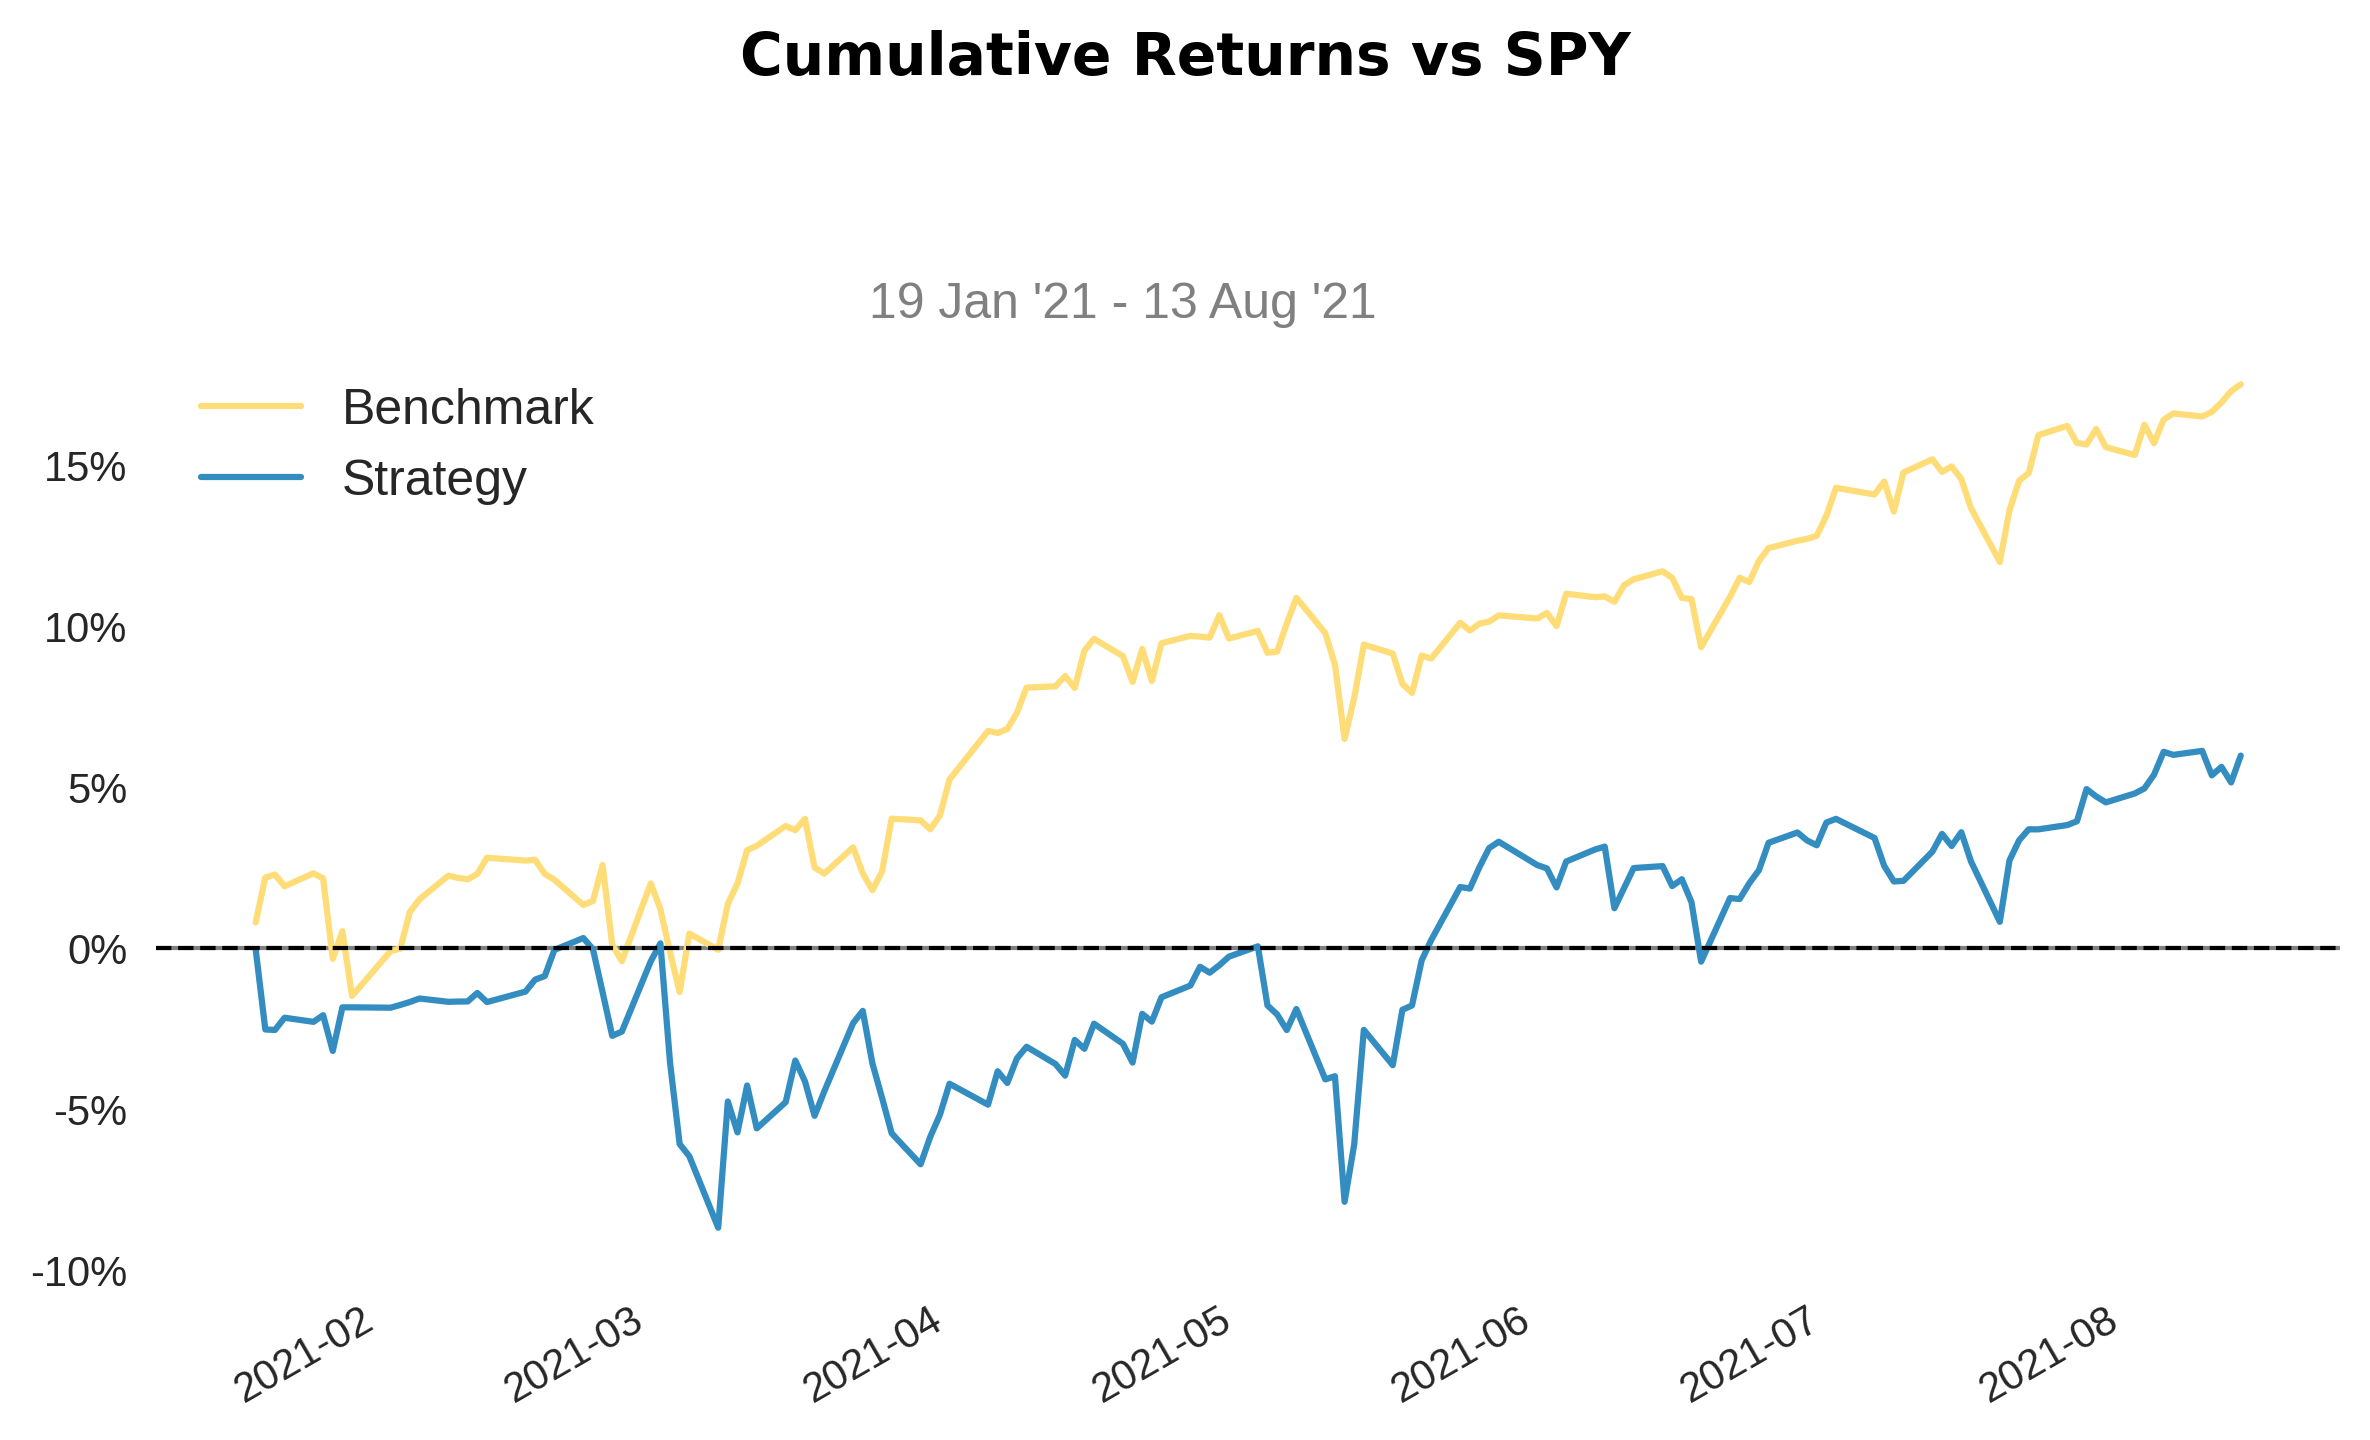

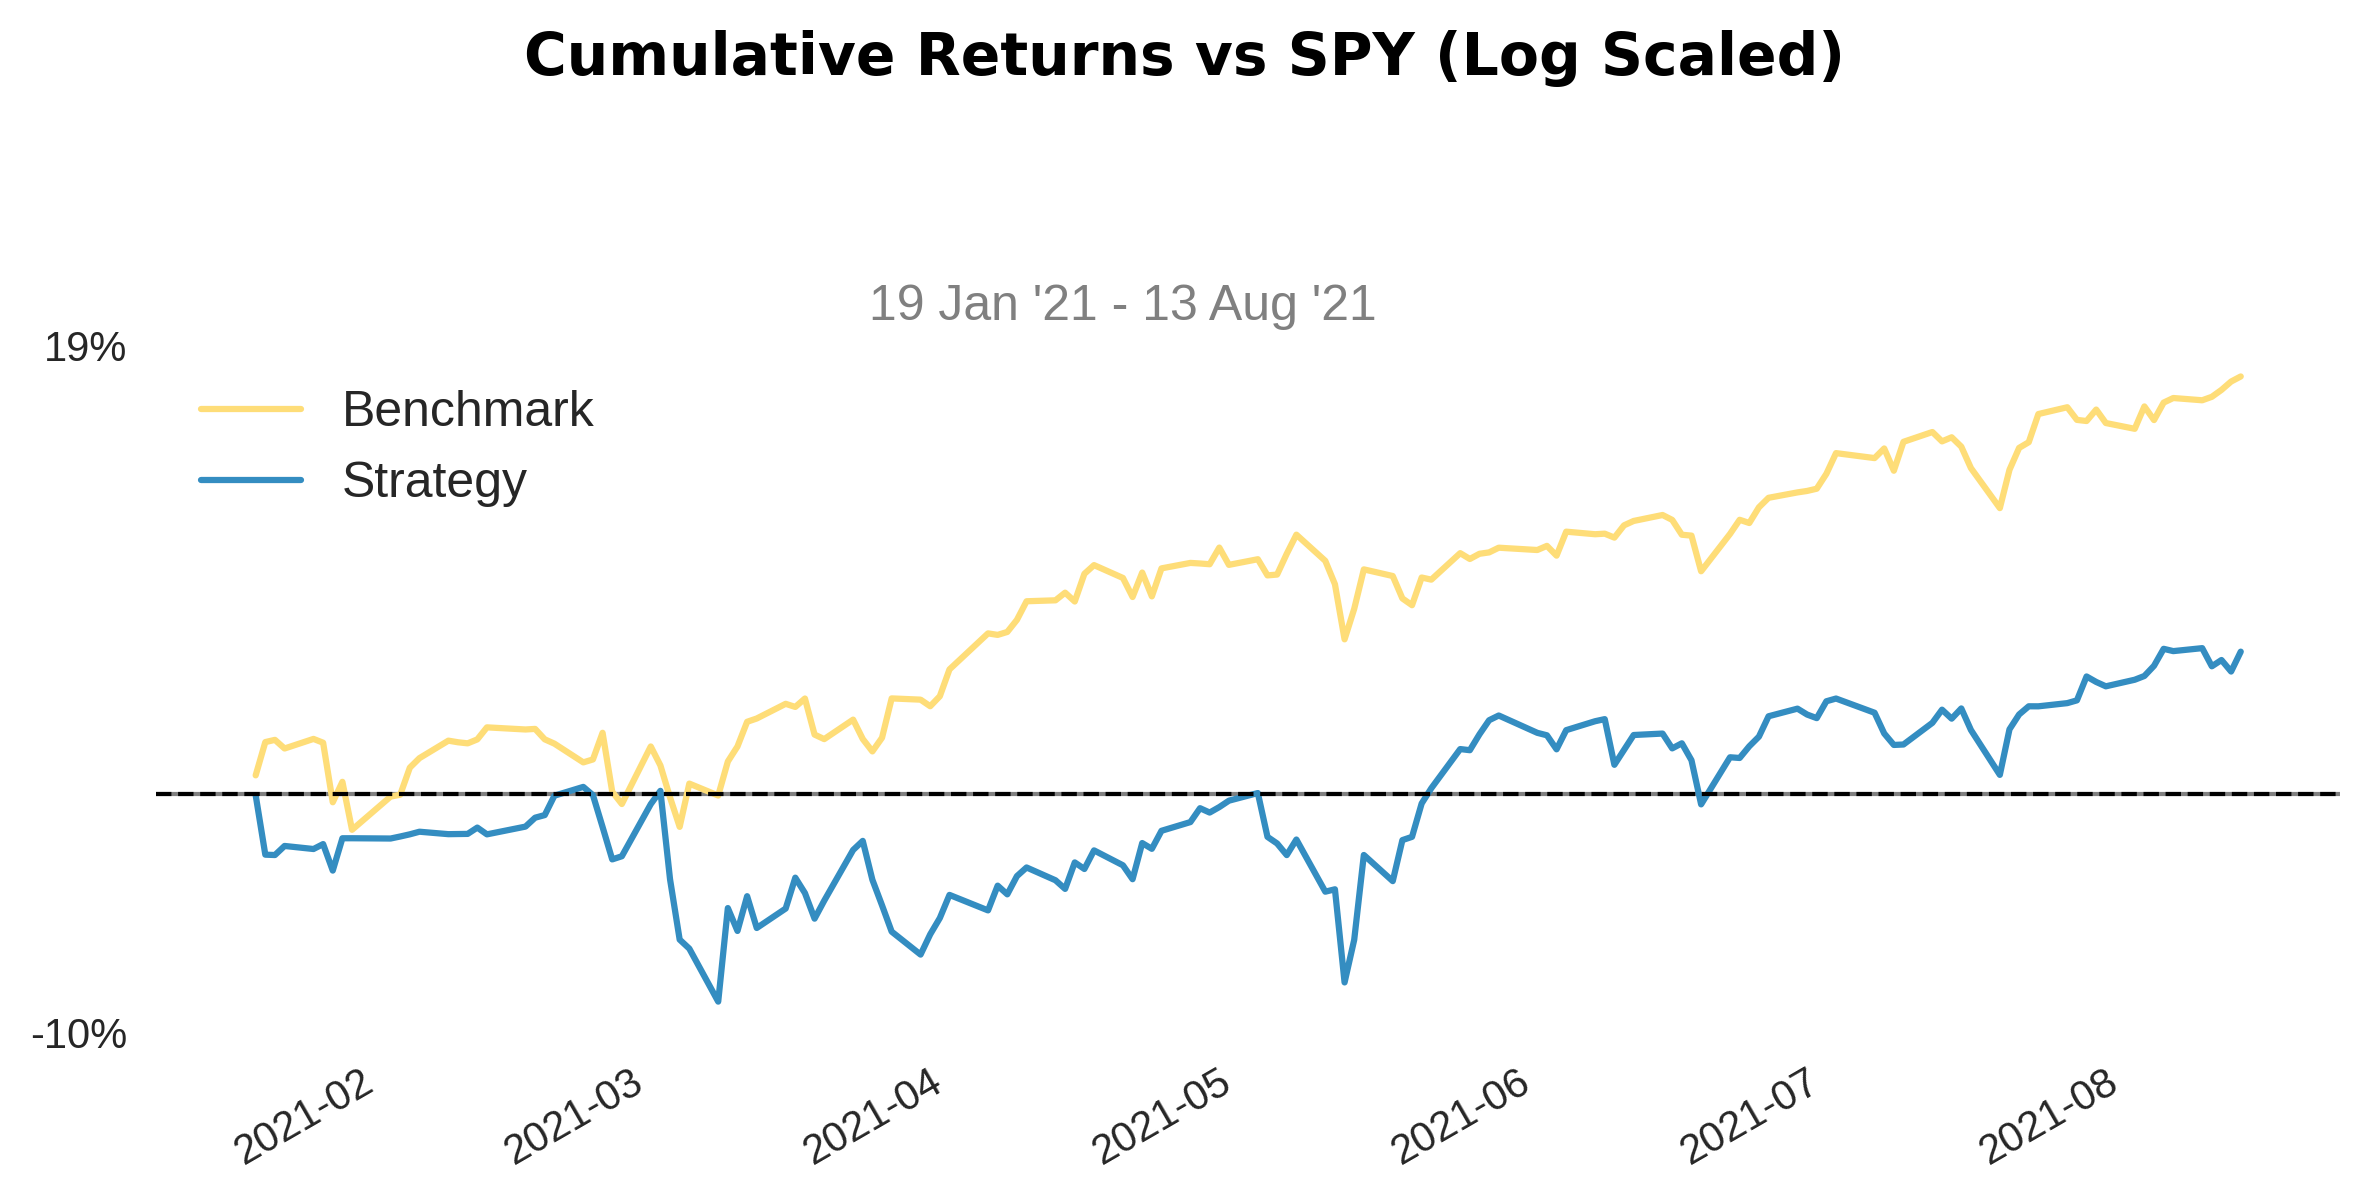

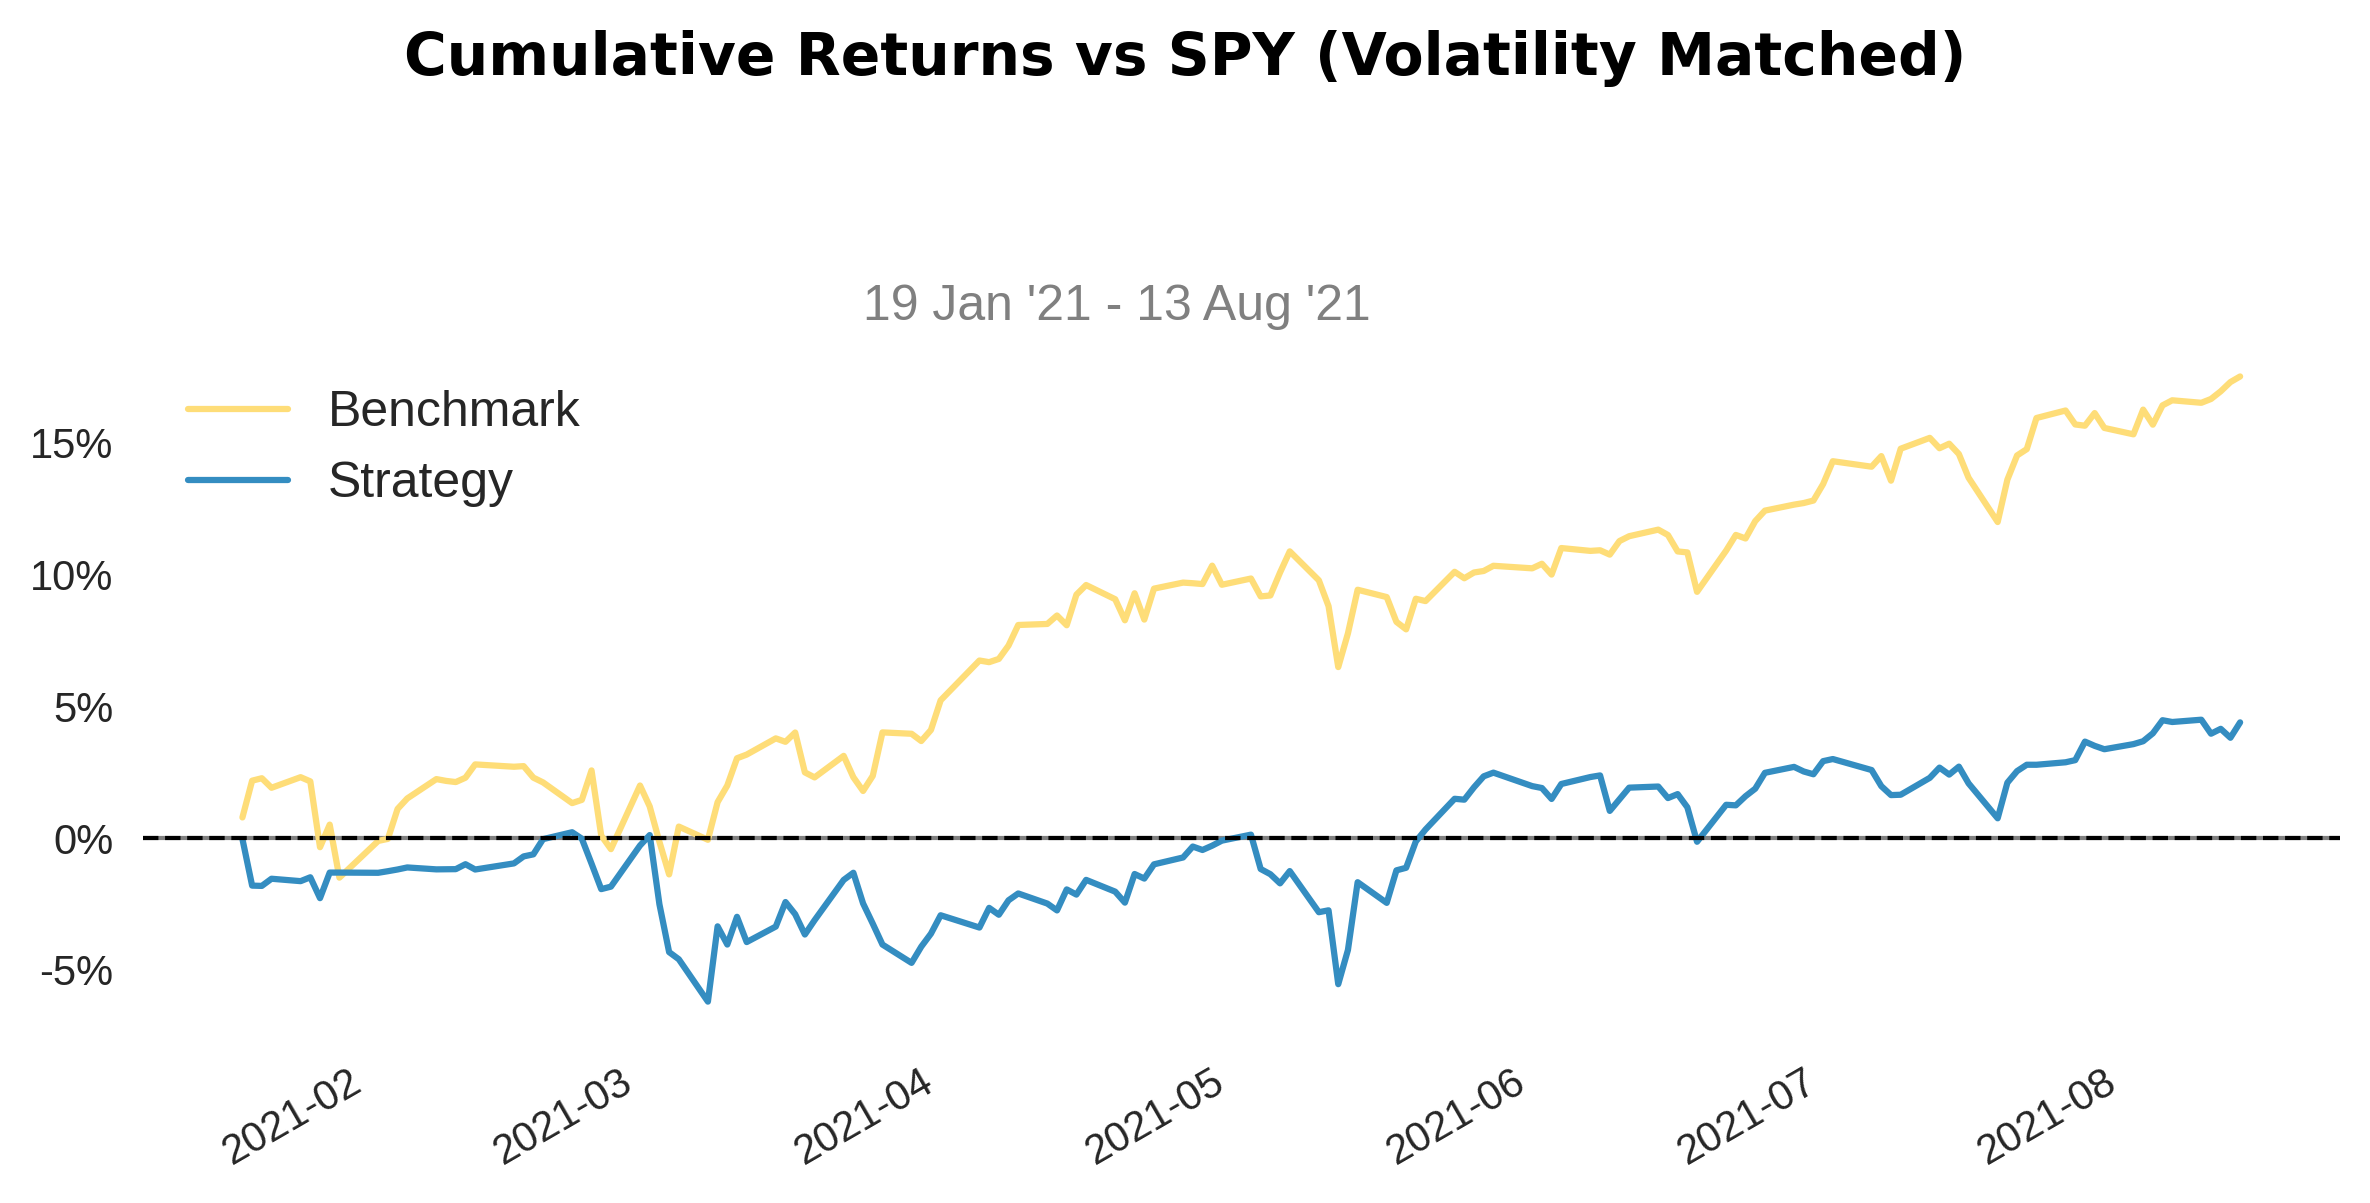

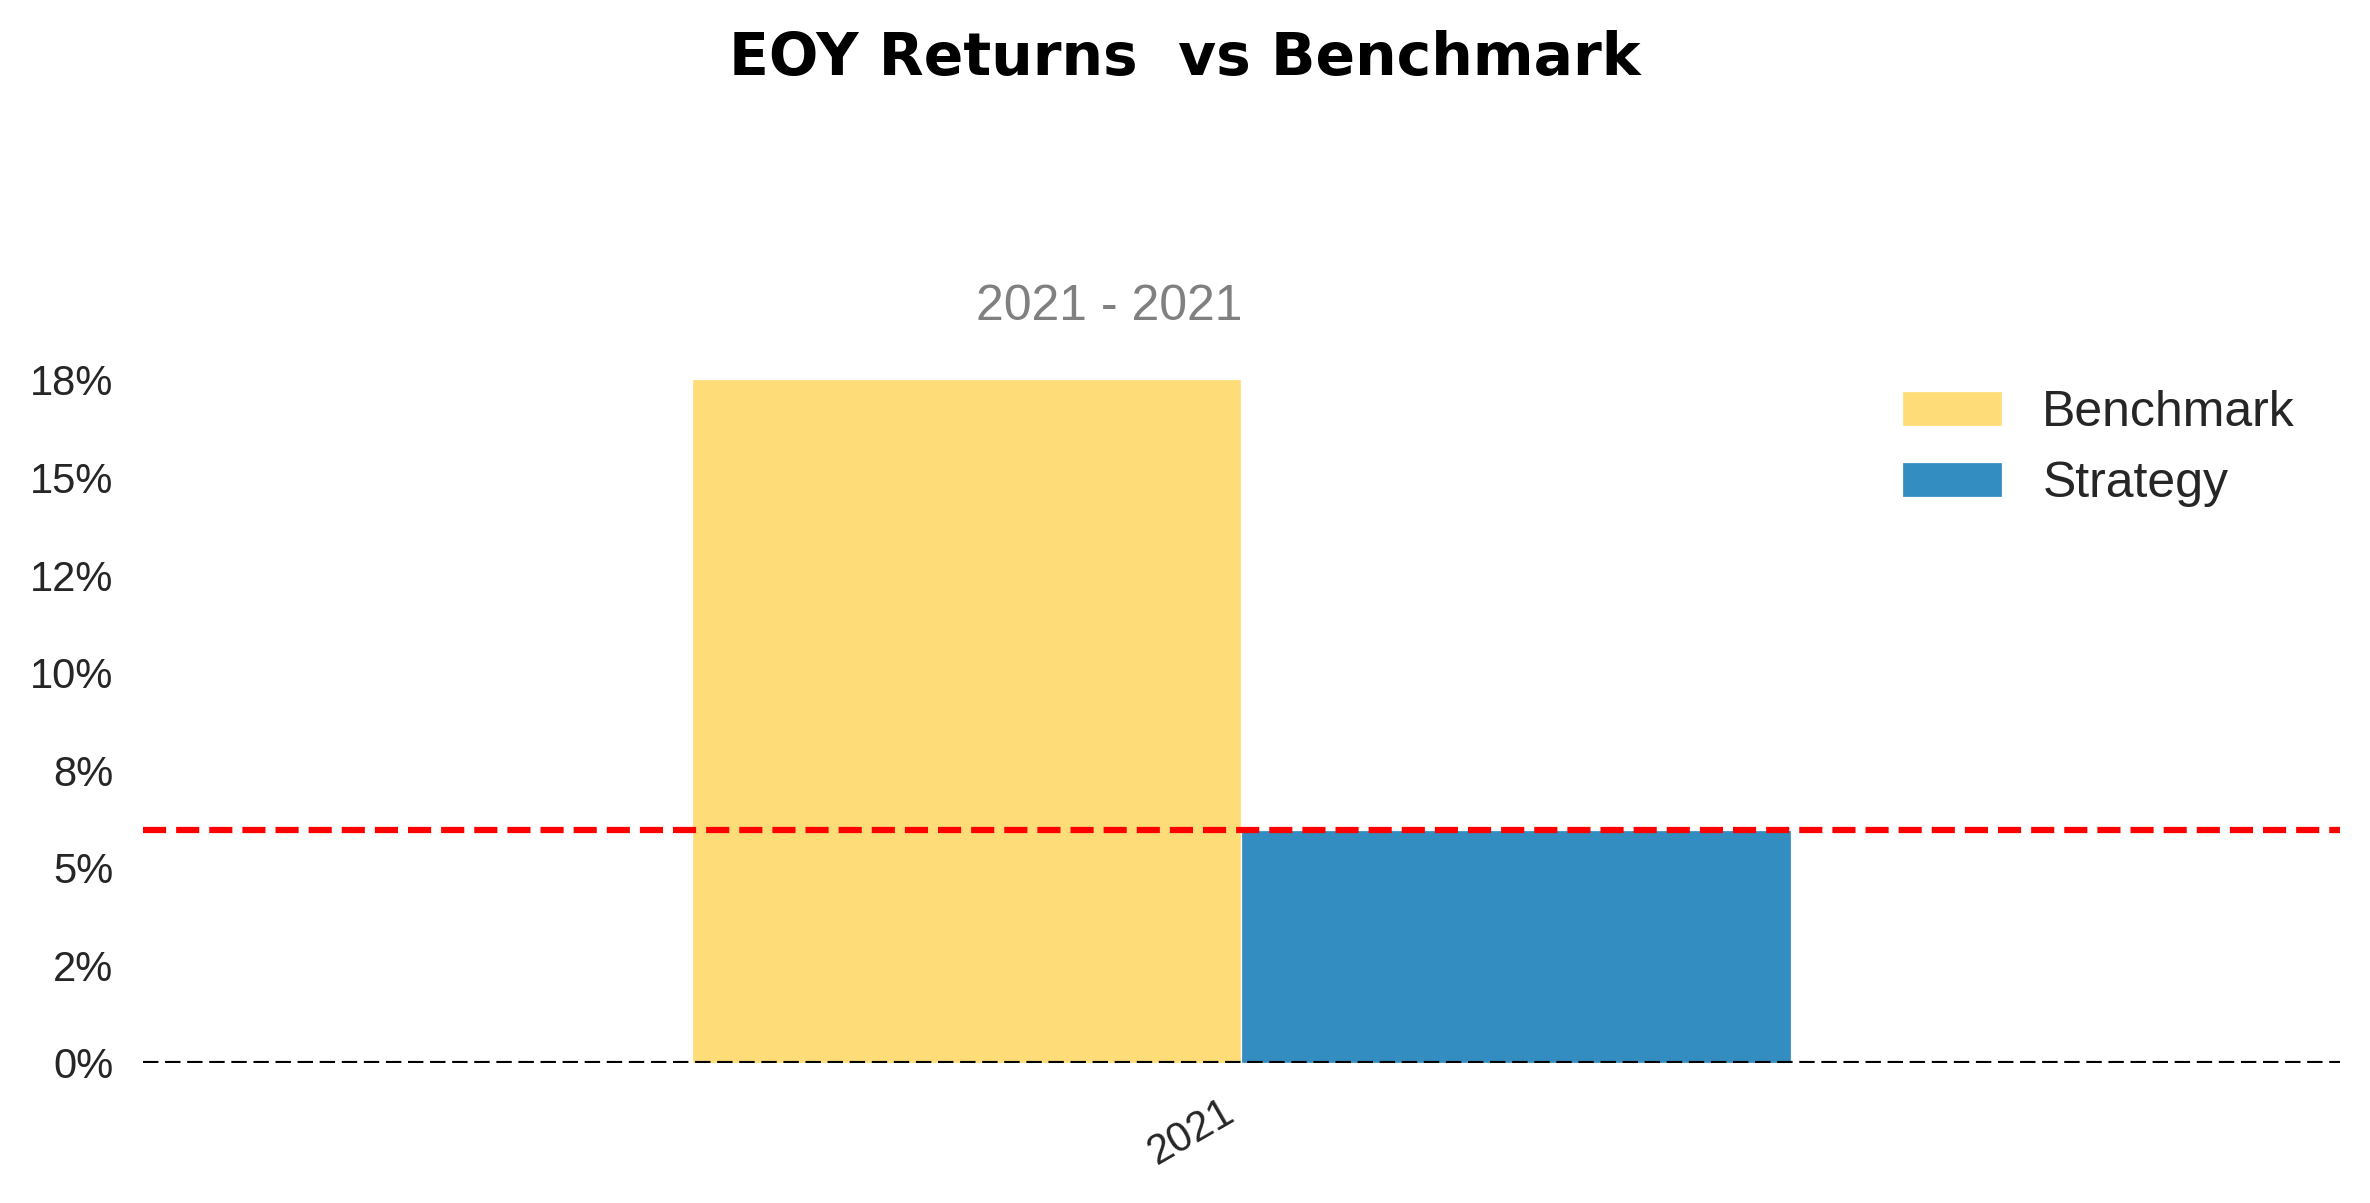

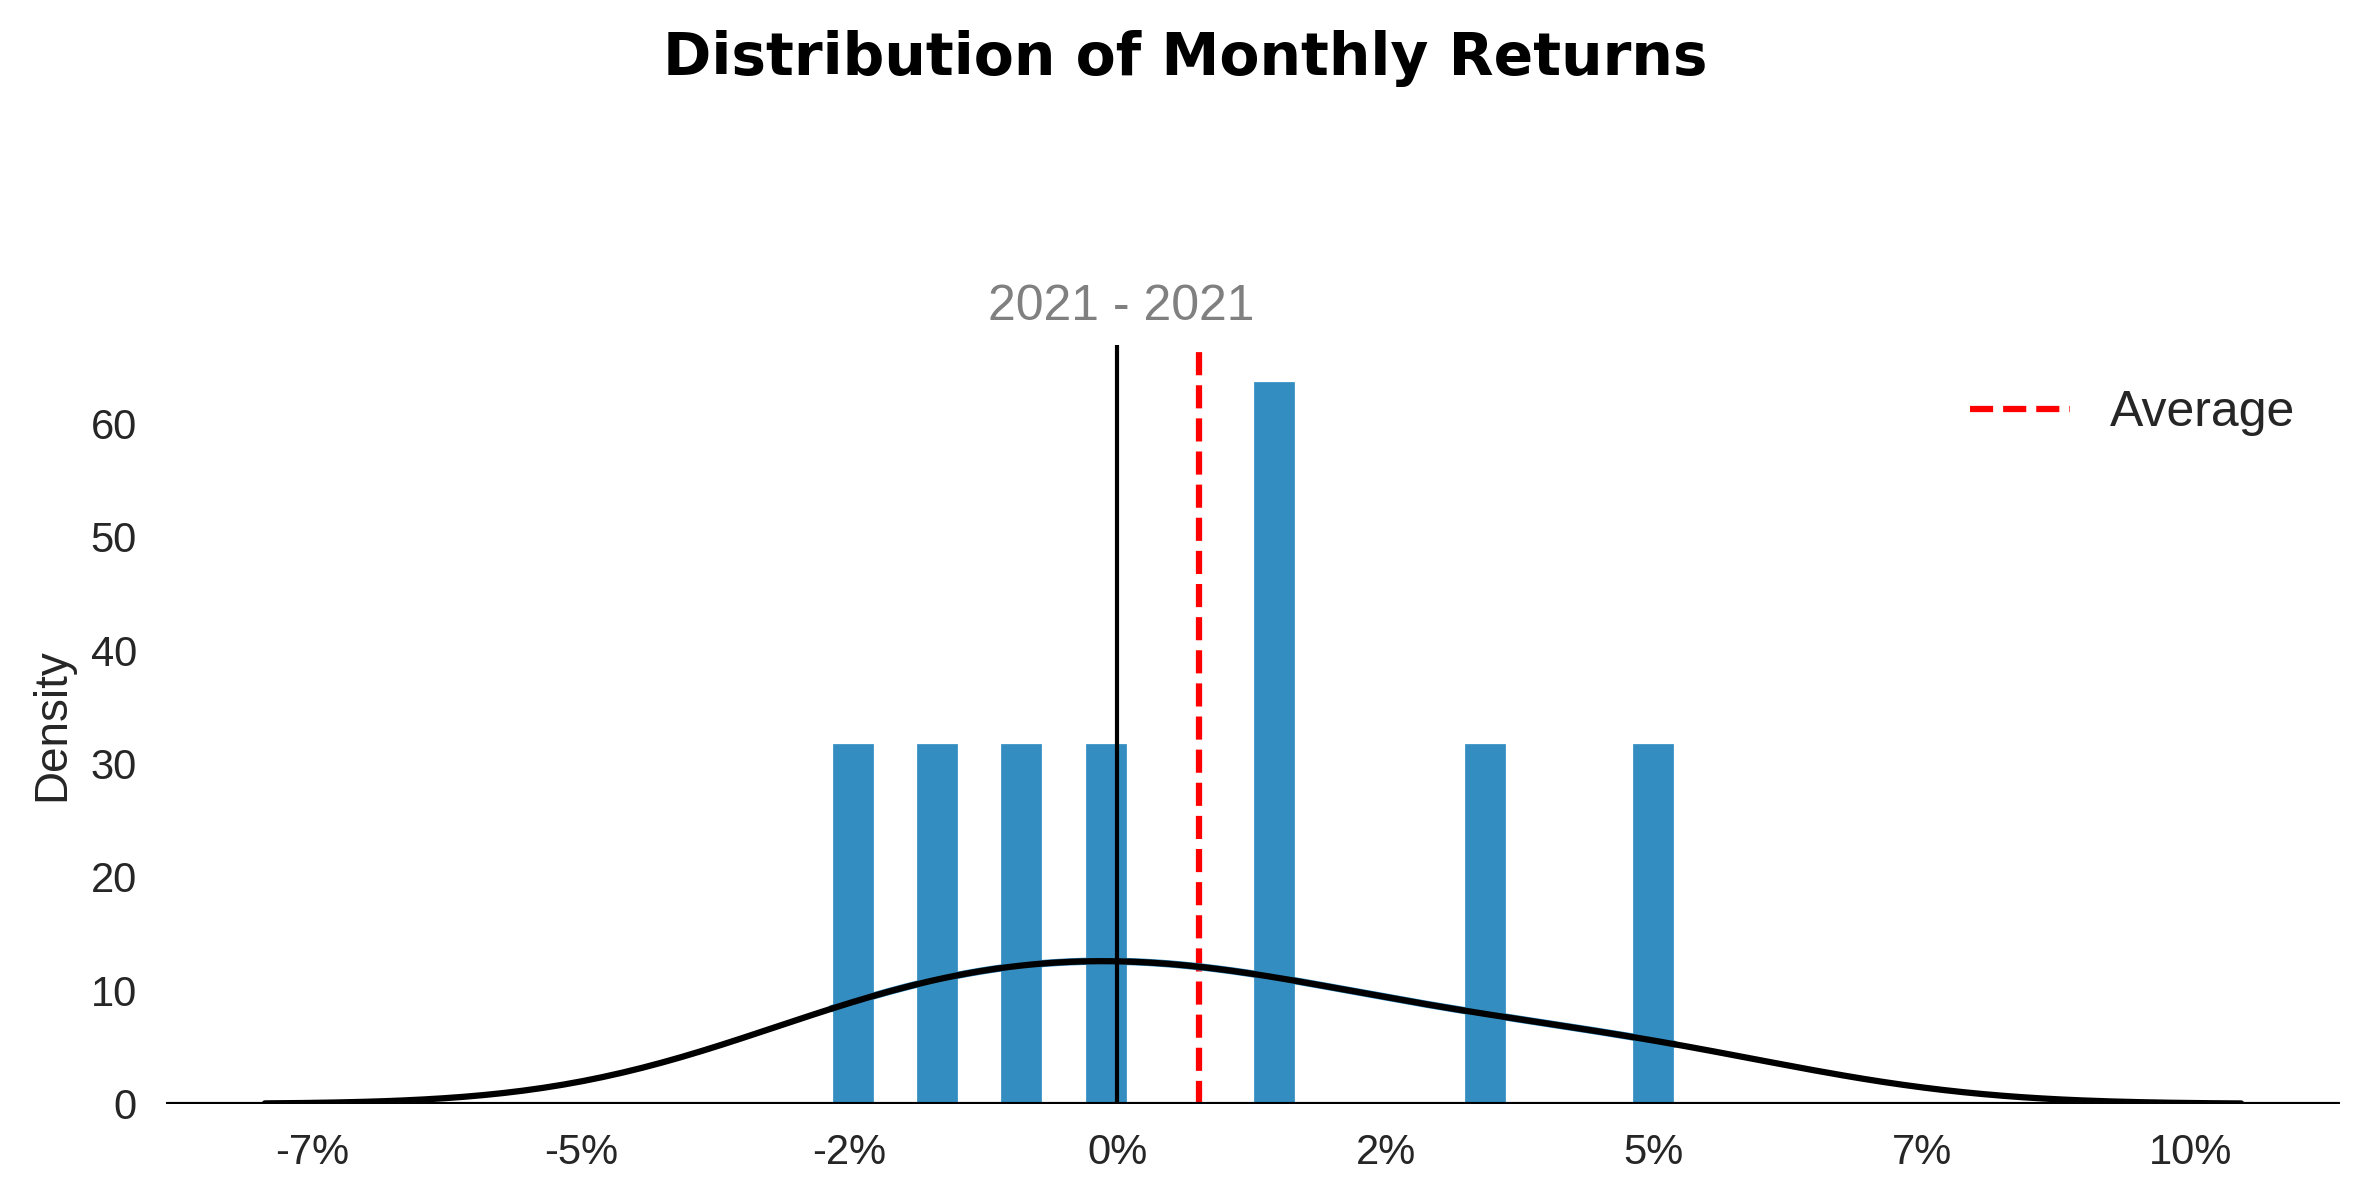

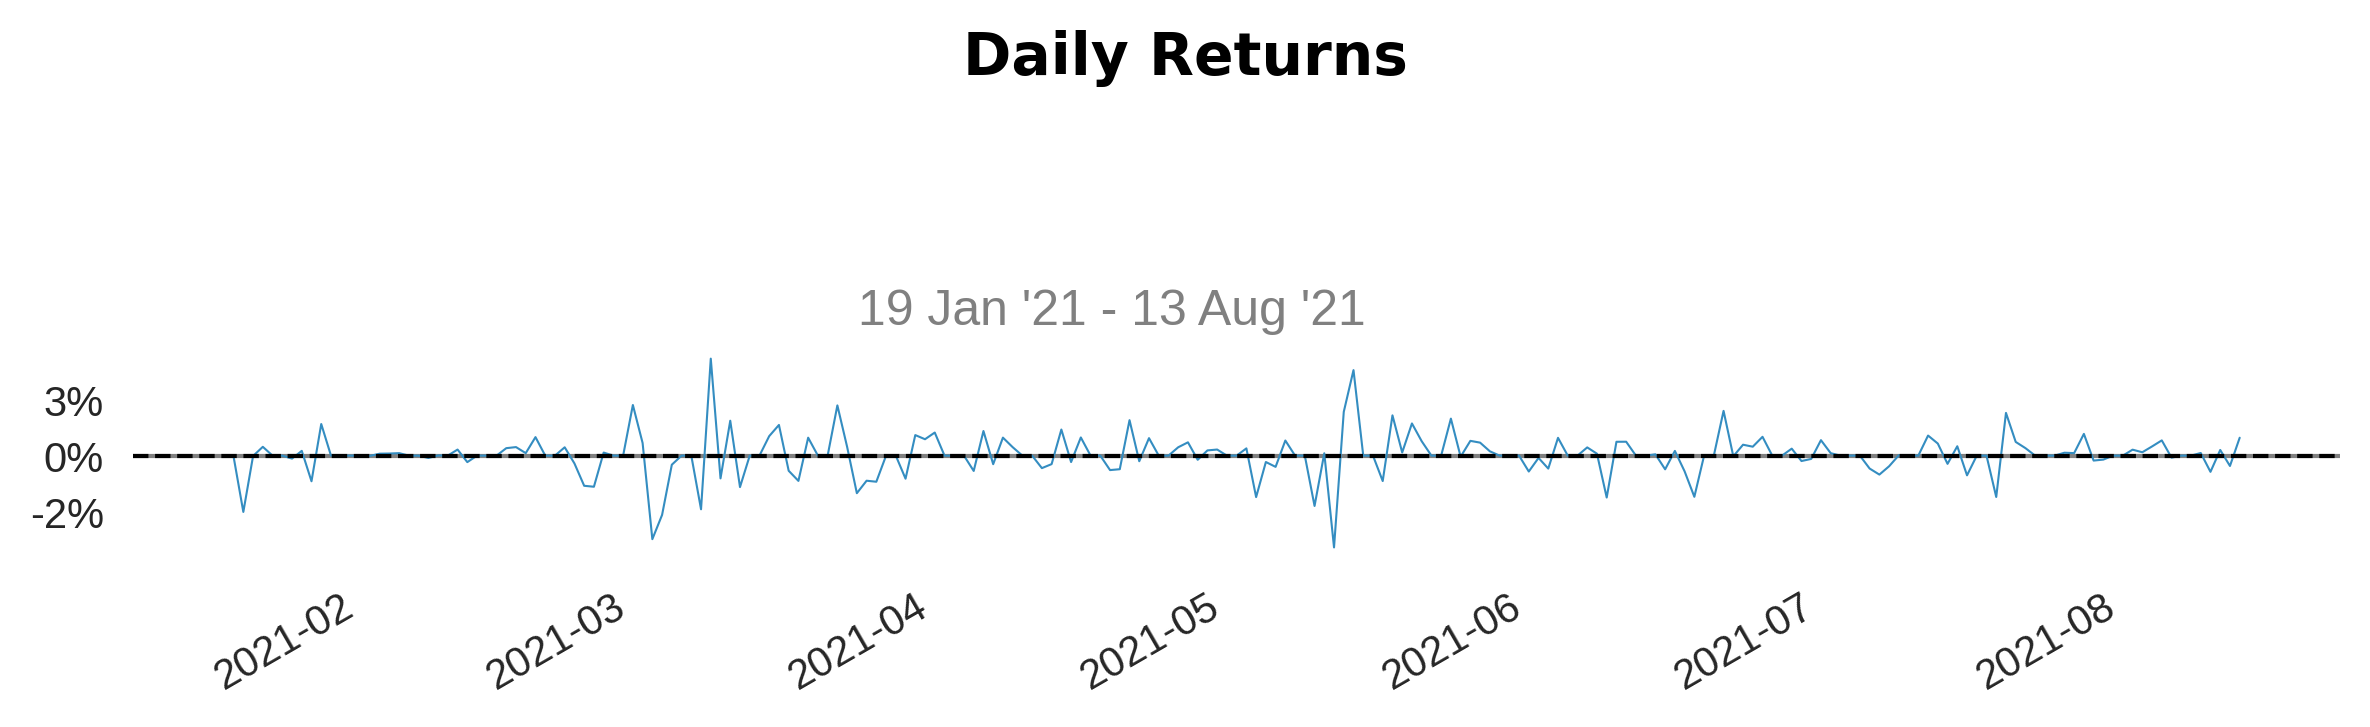

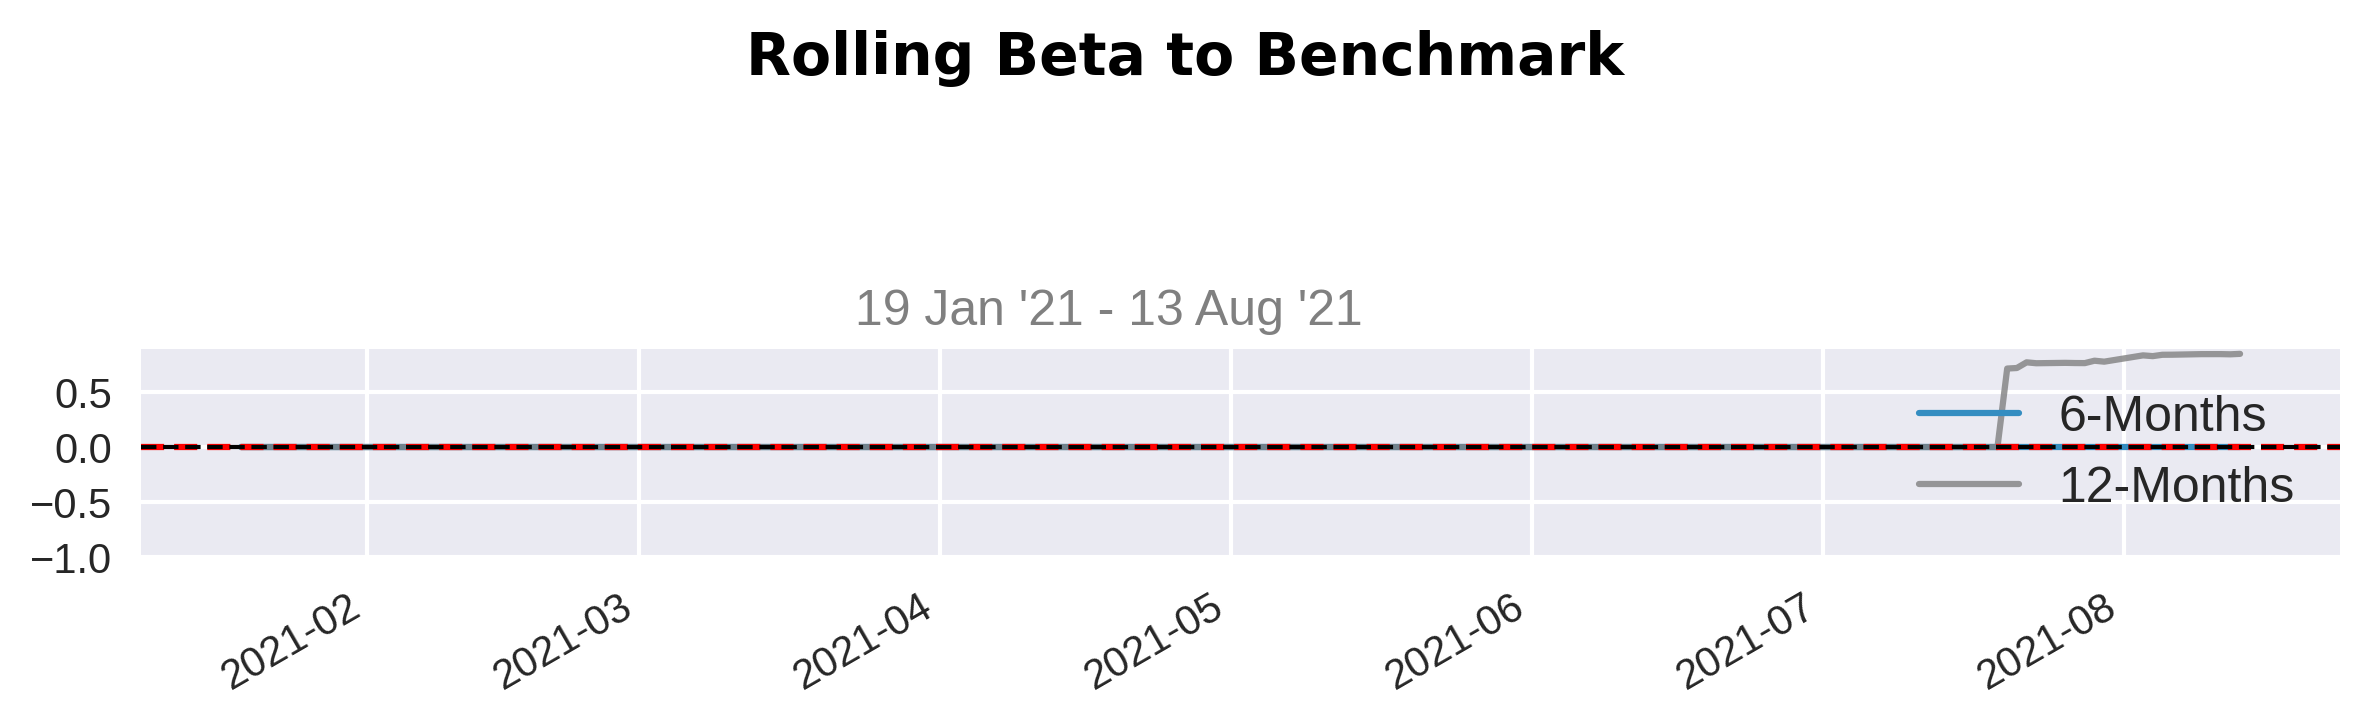

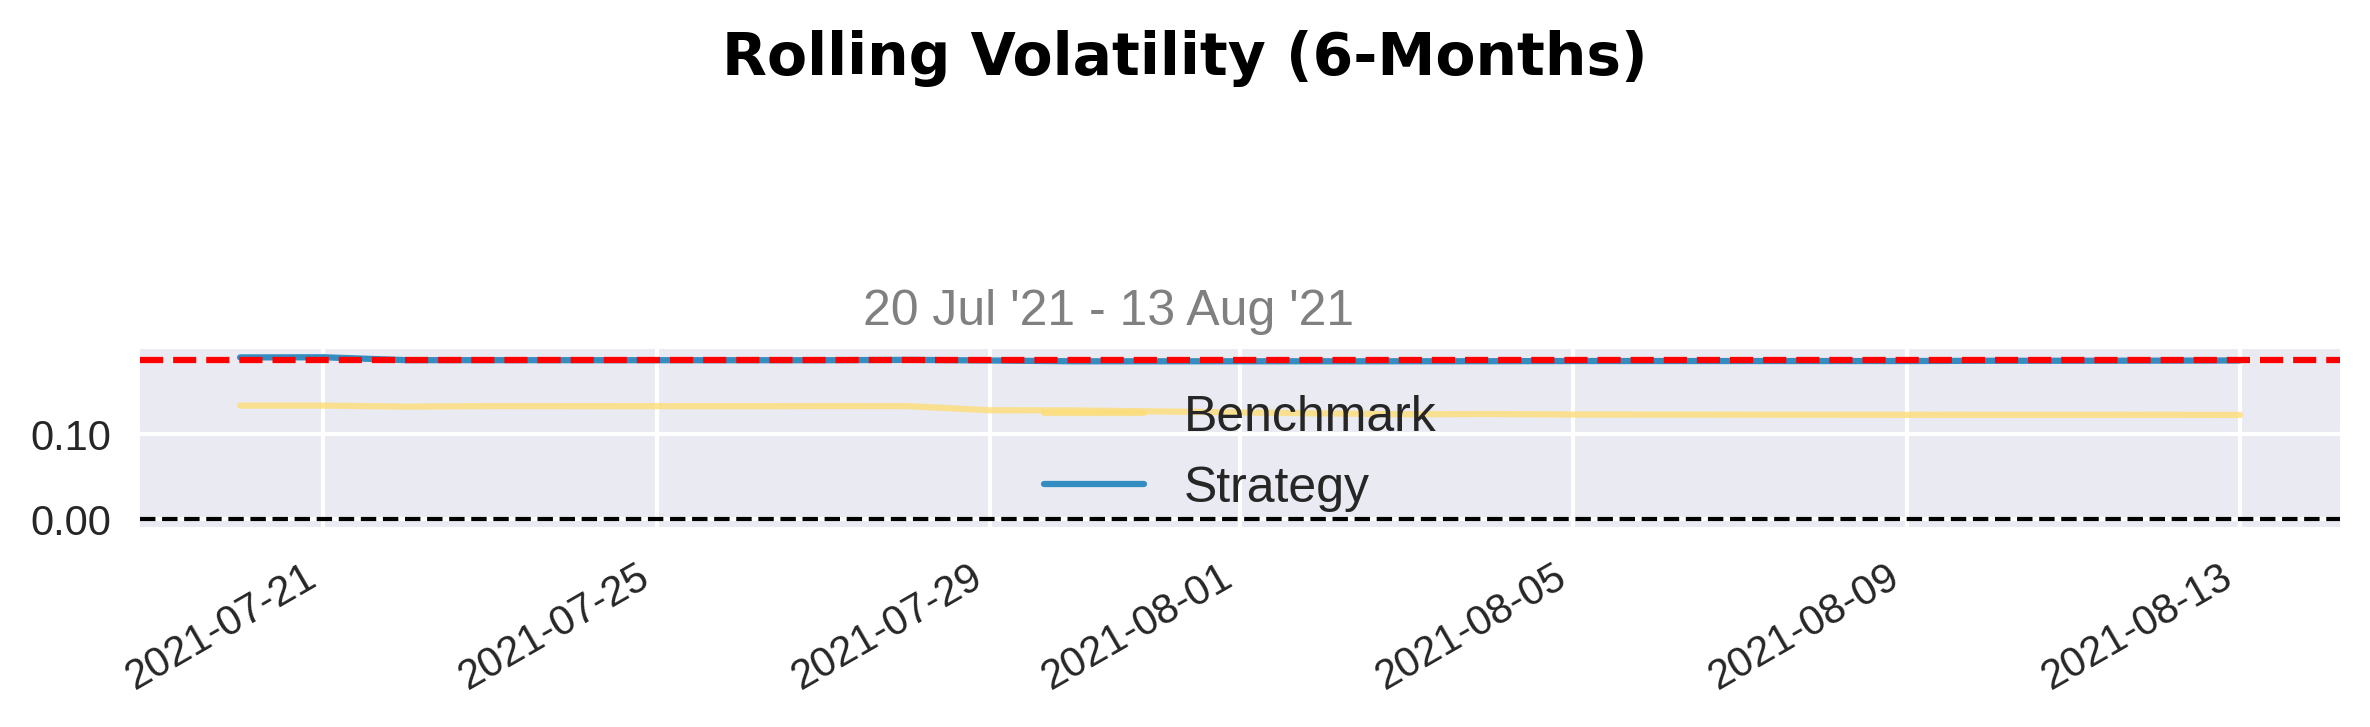

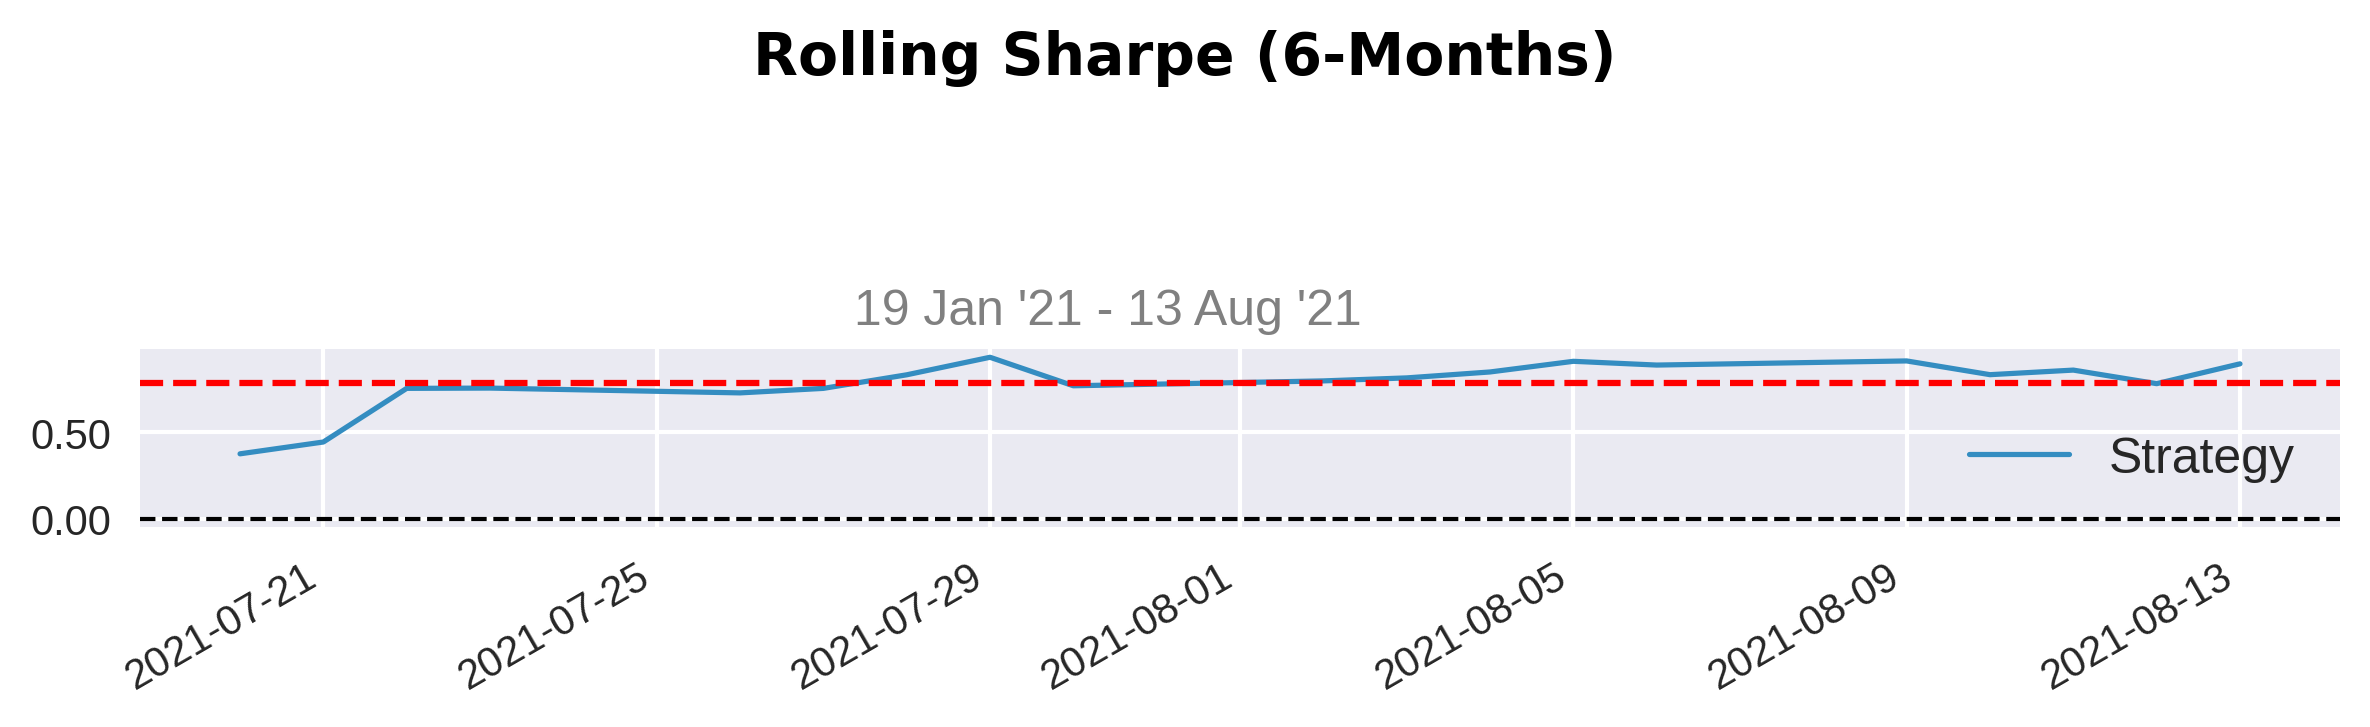

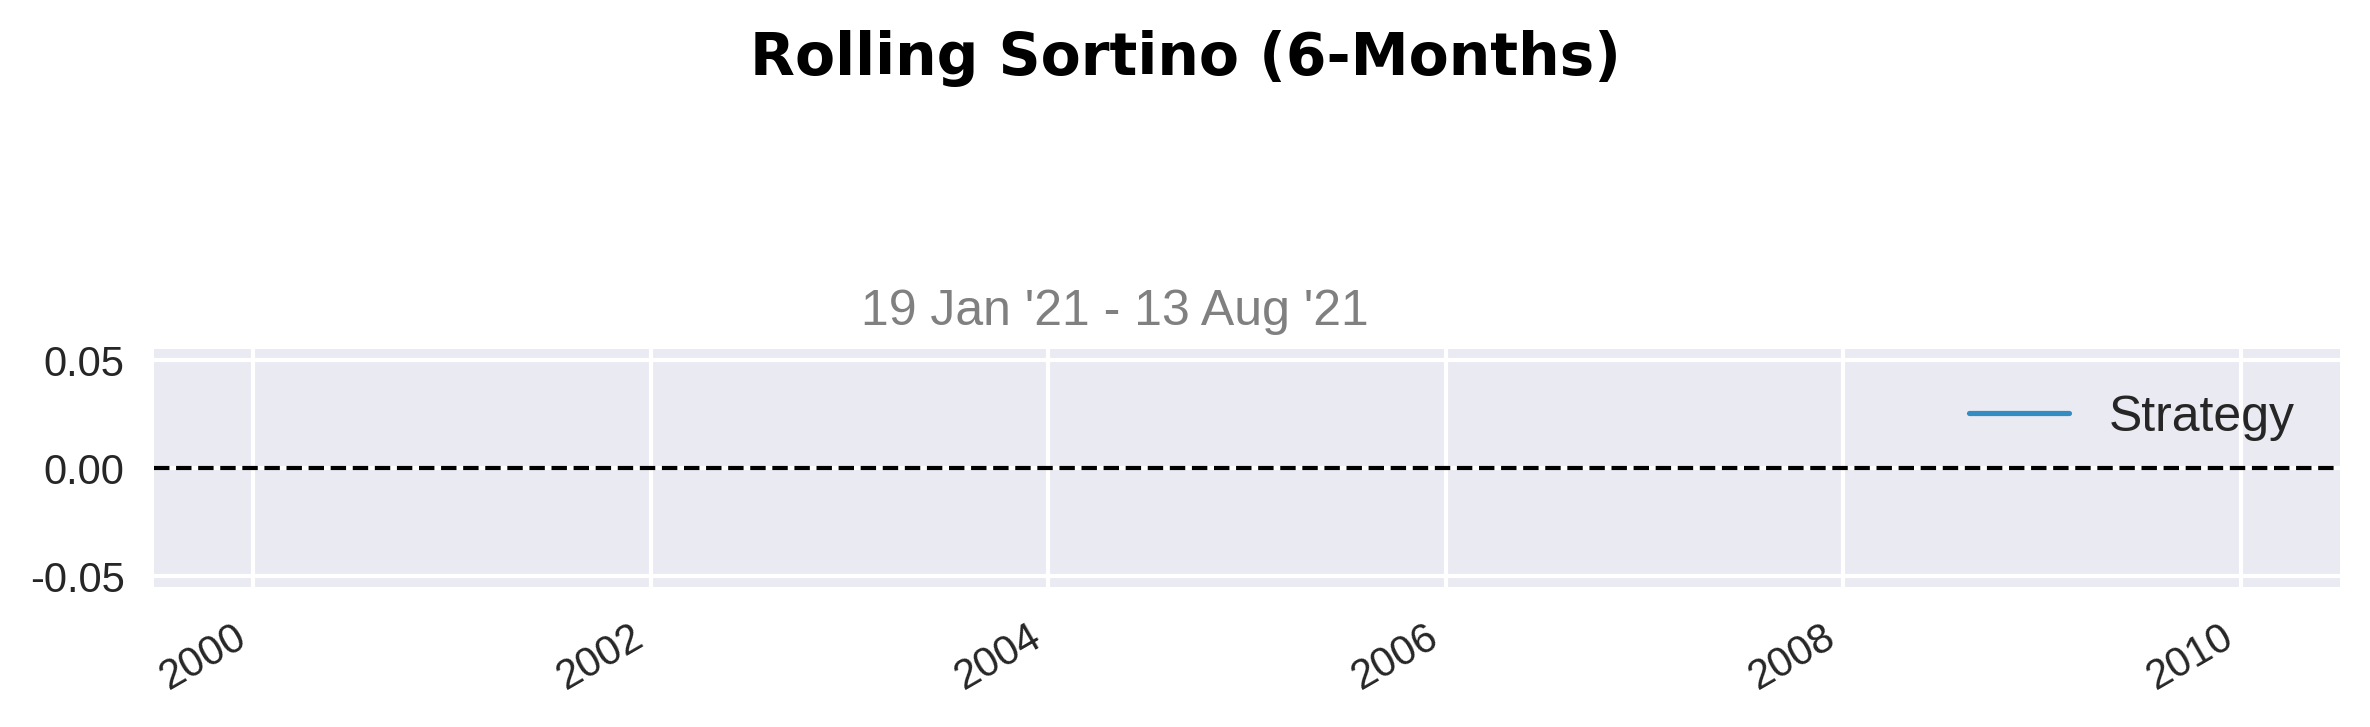

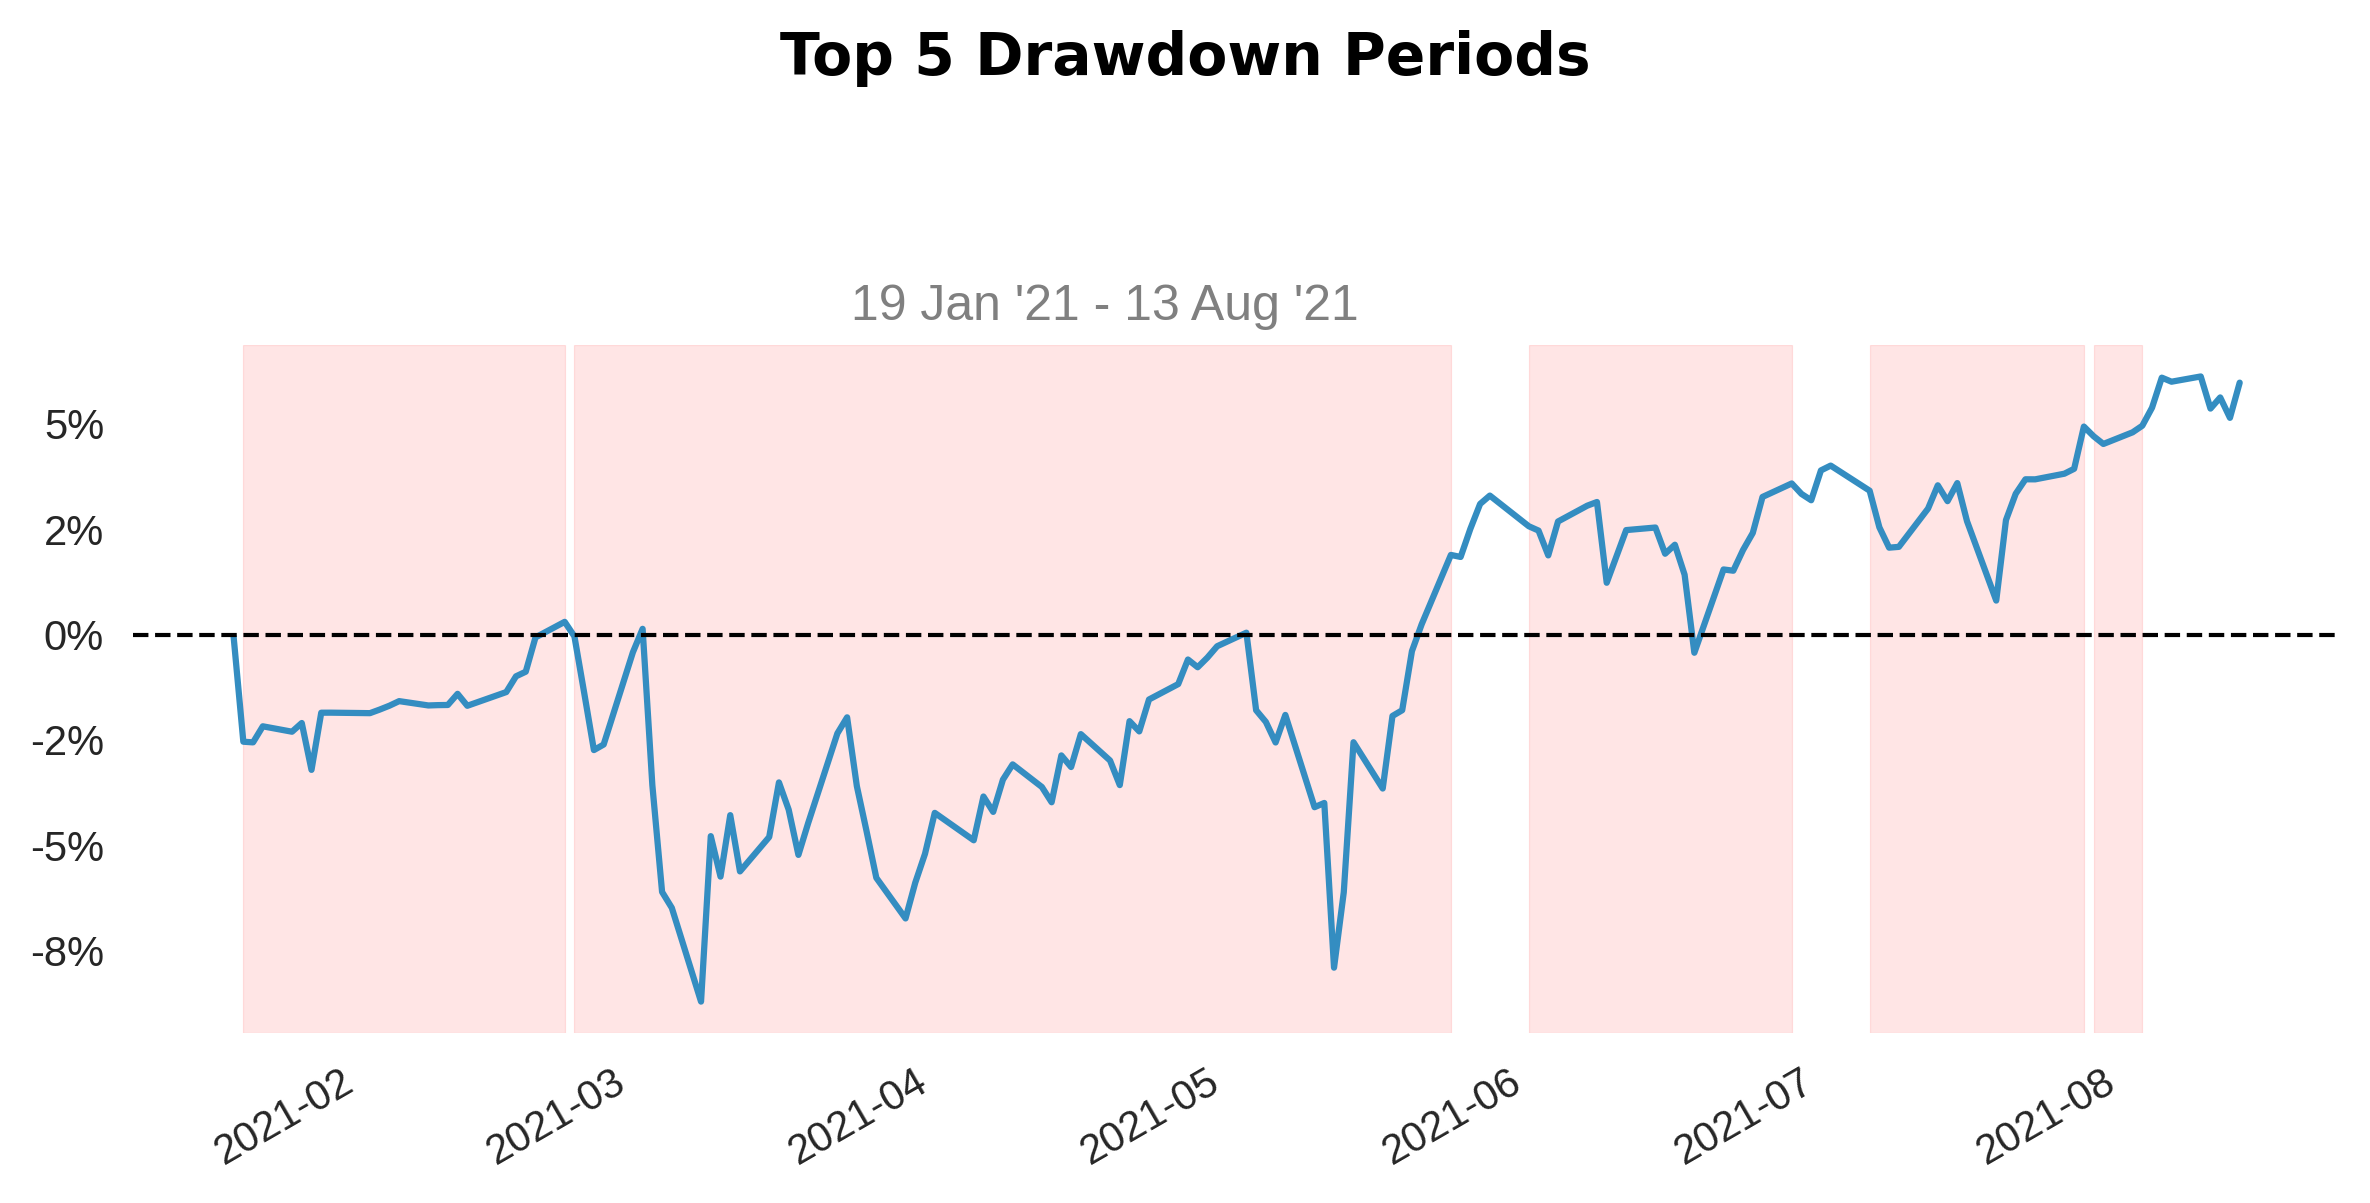

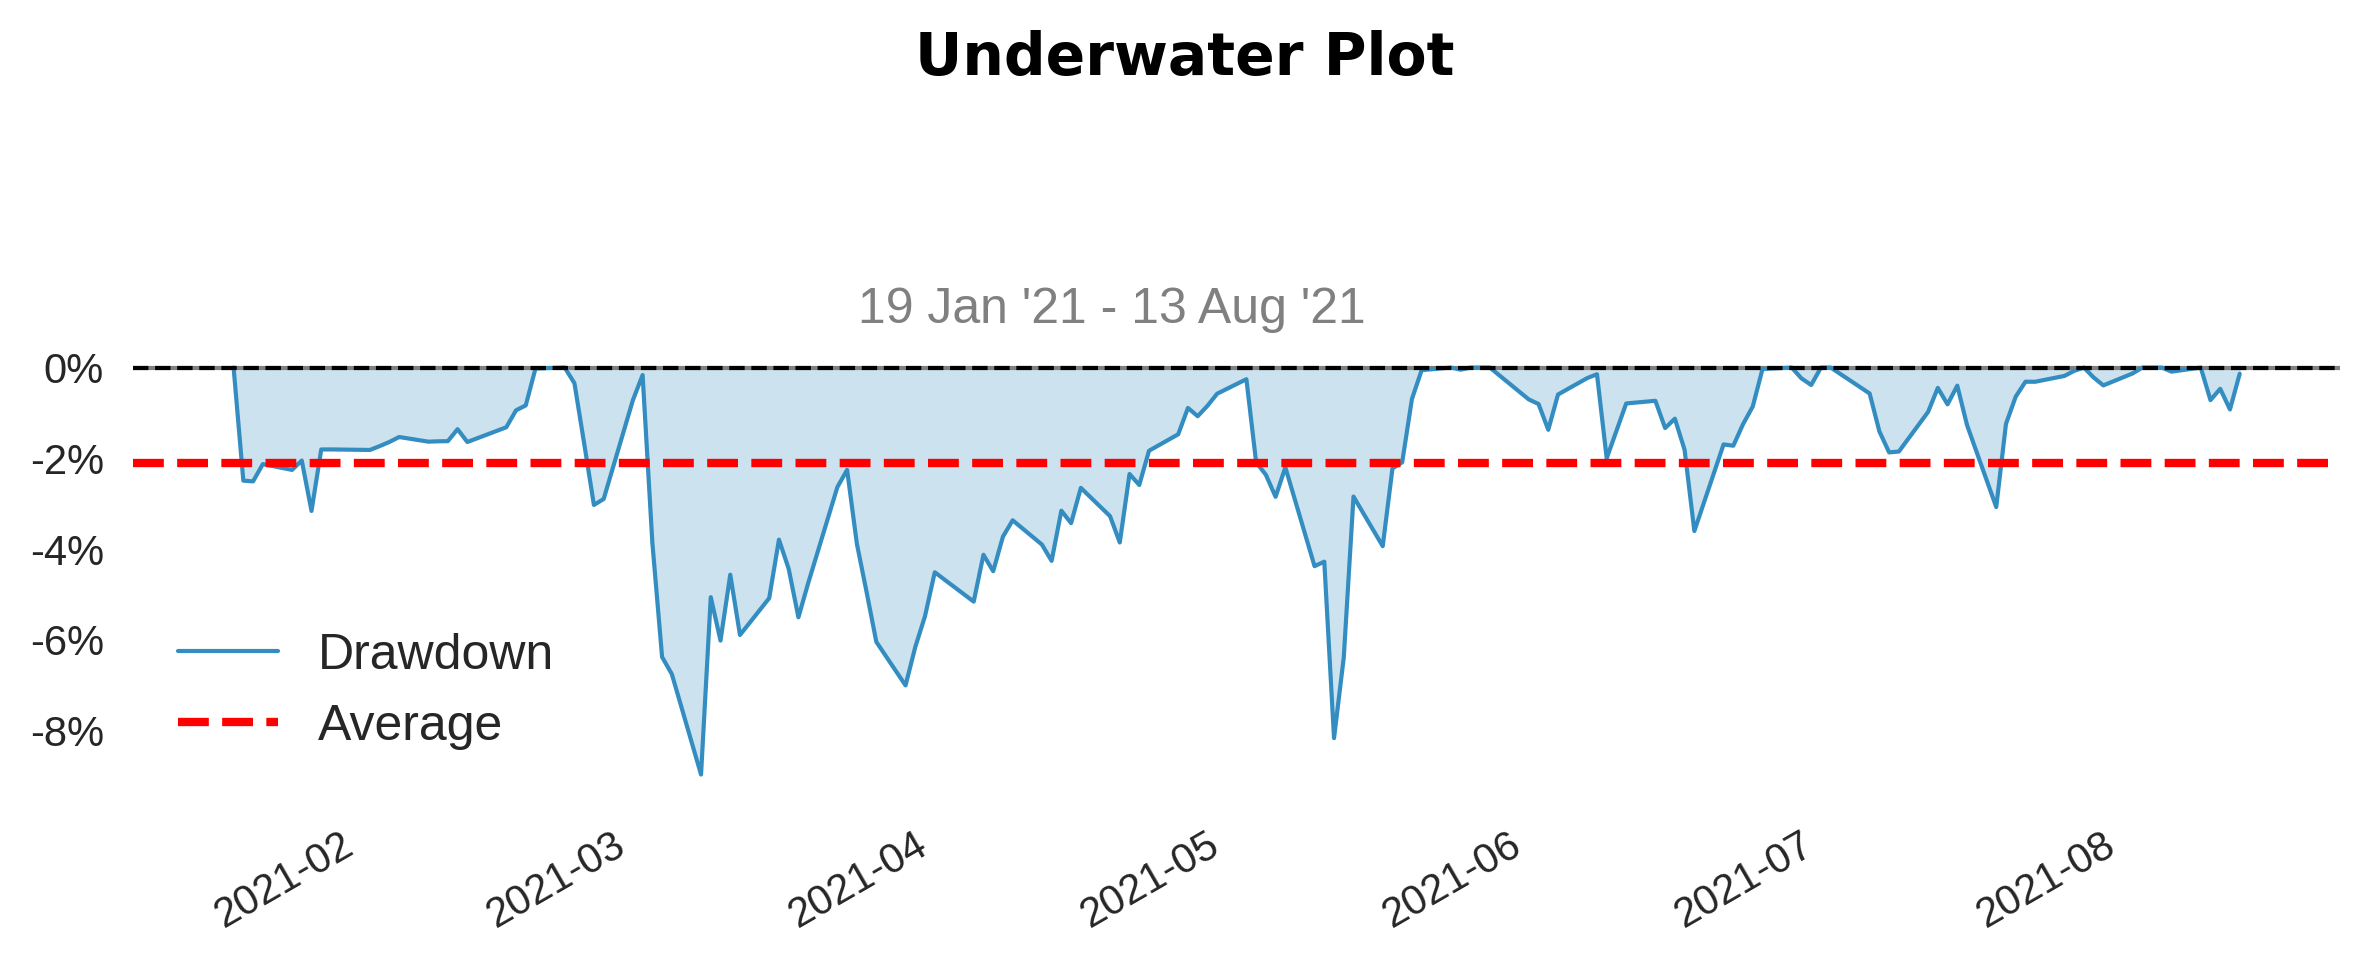

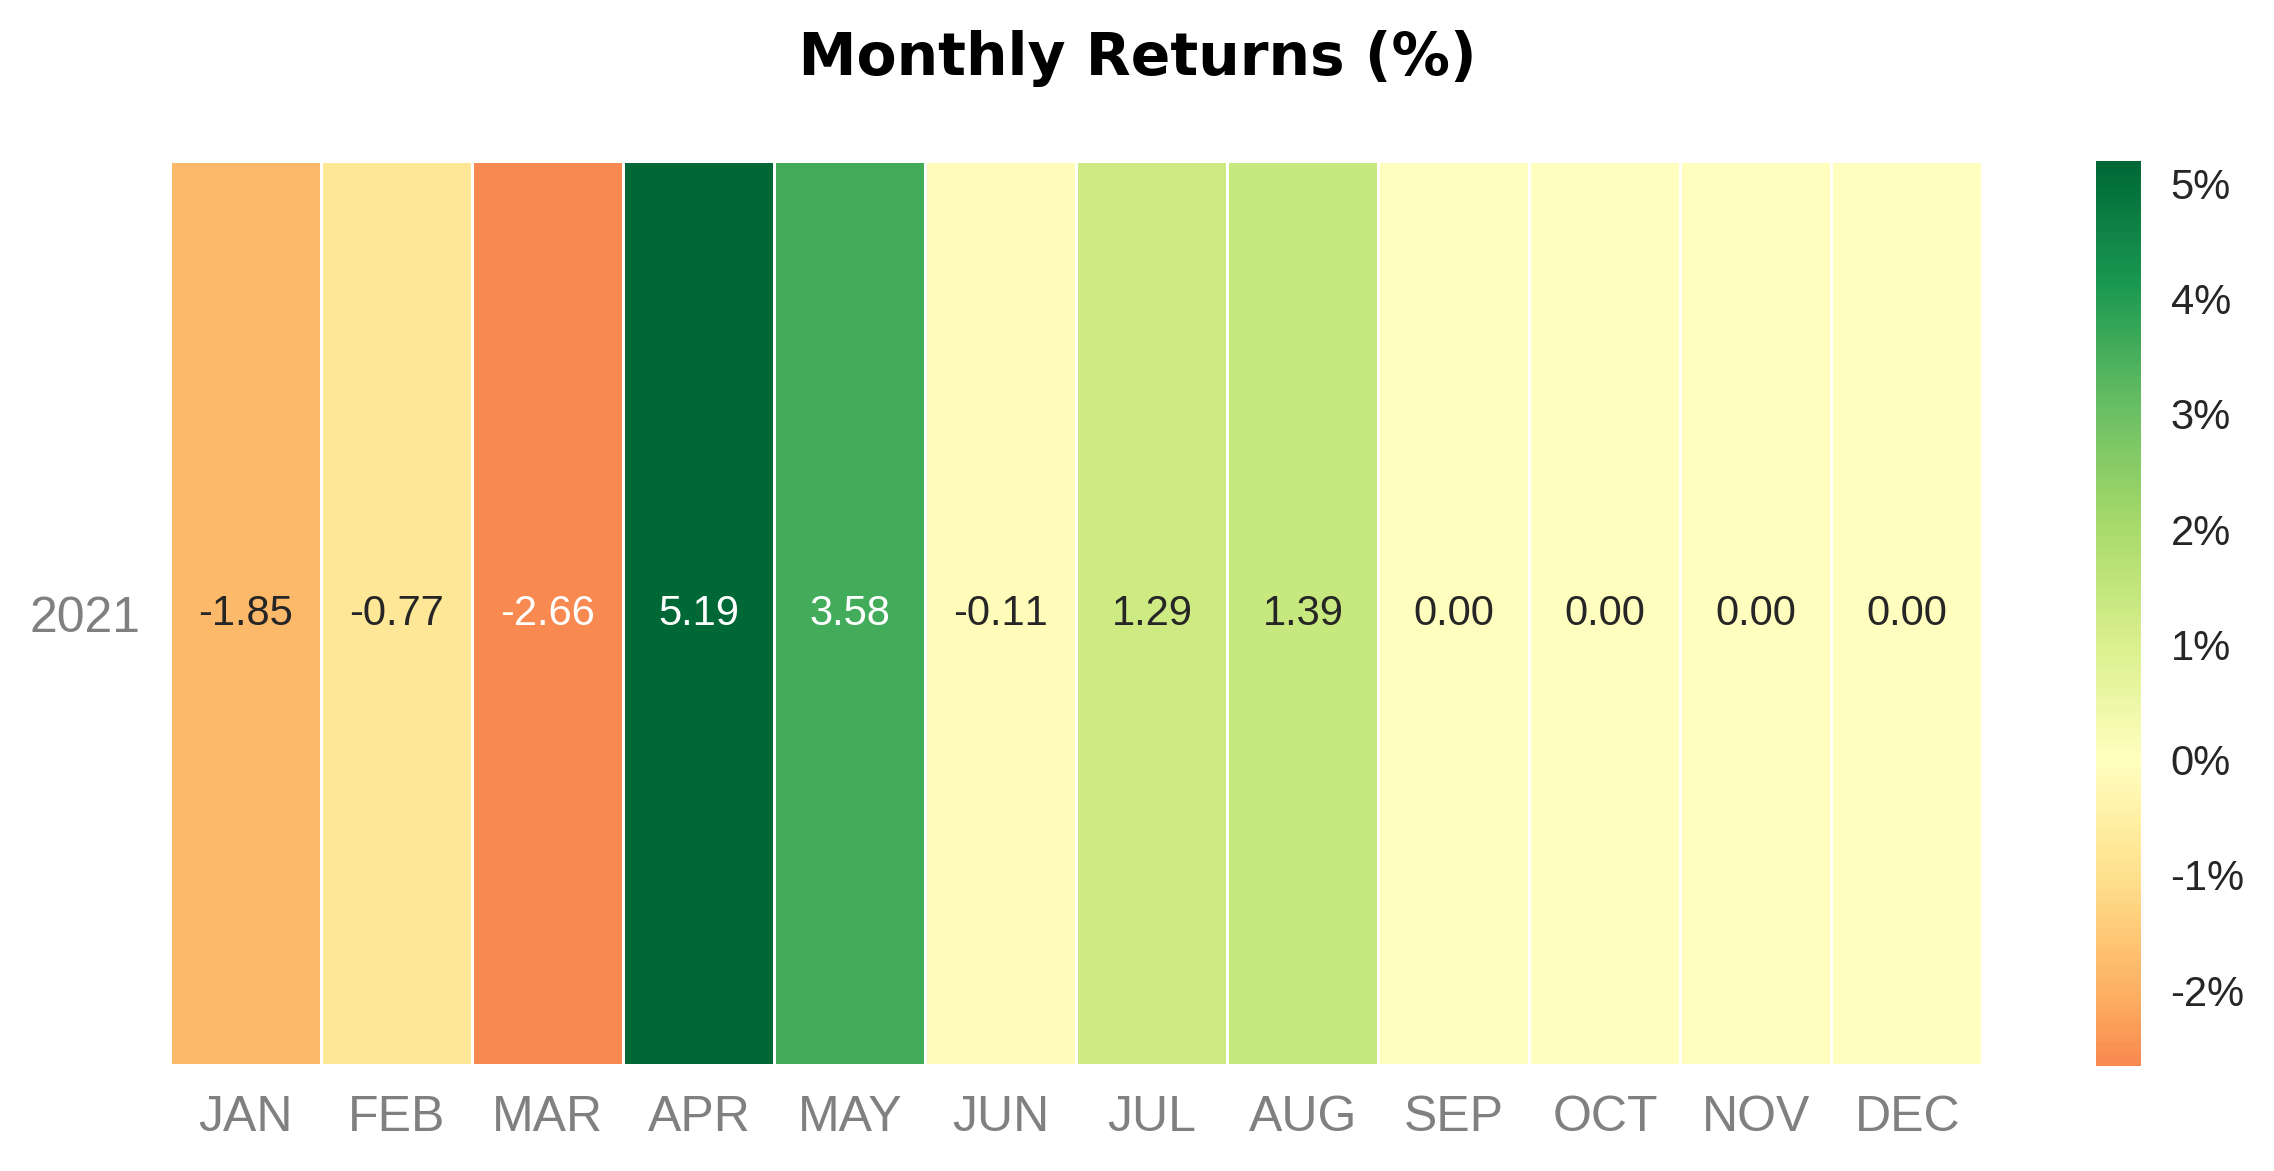

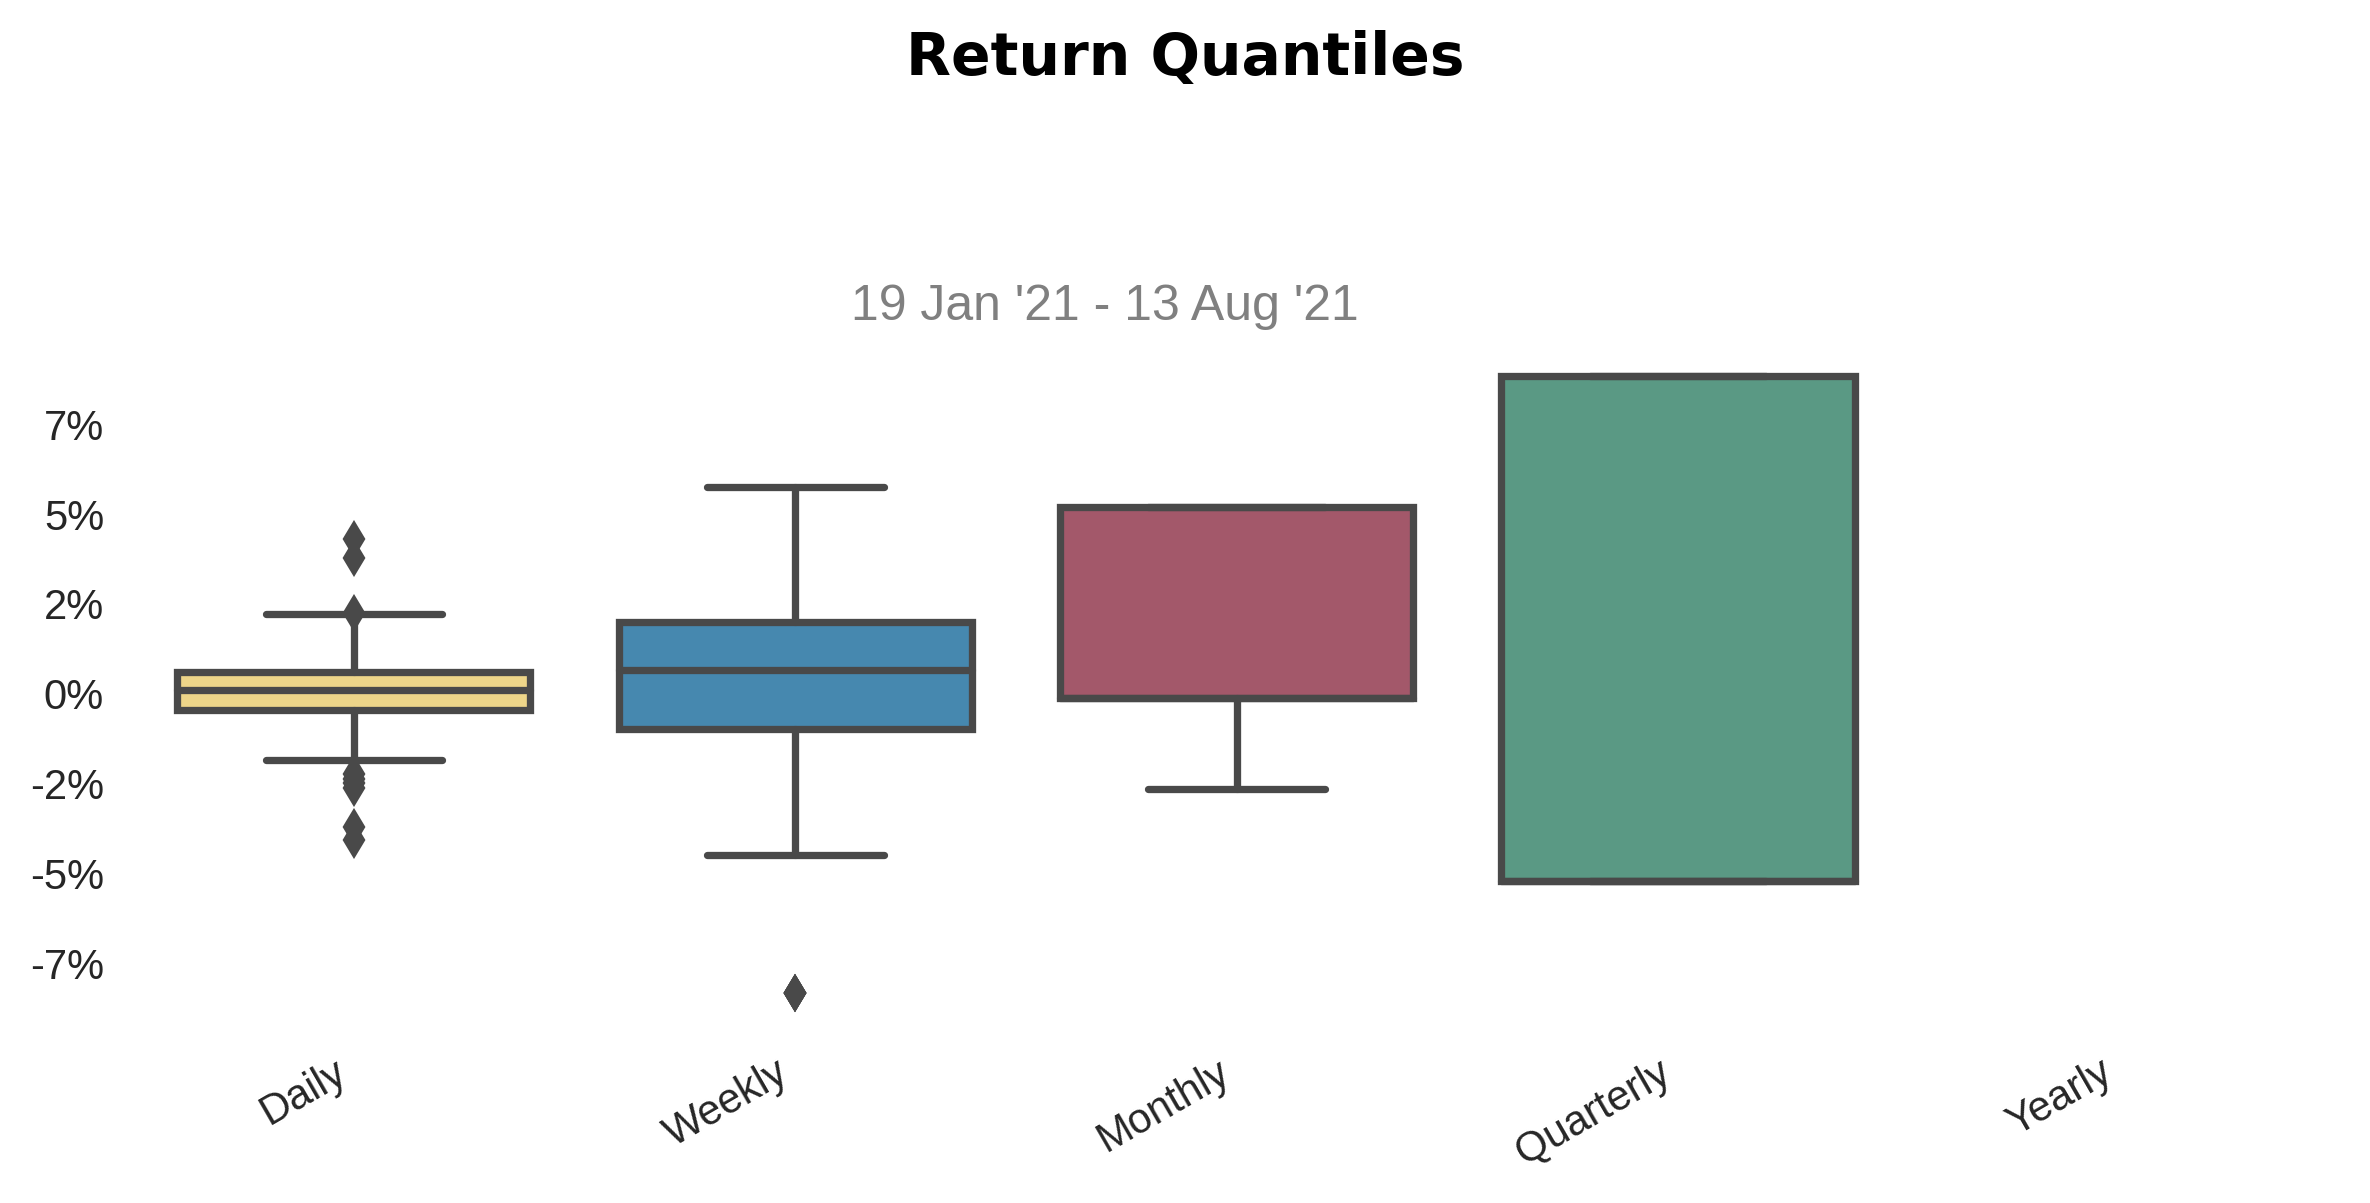

In [12]:
qs.reports.full(returns, benchmark='SPY')